In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
# Import modules
import numpy as np # maths

from time import time# timer for debug

    # gather results obtained from the runs

    # system commands
import os
    
    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [3]:
# Create a folder to save the pictures
foldername = '../../MFUs/Runs_04-09-20_EasyPhase_L12/'
foldername = '../../MFUs/Runs_15-09-20_EasyPhase_L12/'
#foldername = '../Analysis_PSI/Runs_12-11-19_ssfMagnField/'
results_foldername = 'Results_21-09-20_nsms524288_nips4/'

os.makedirs('./' + foldername + results_foldername, exist_ok = True)

filenamelist = ['KEasyPhase_L12_it0_nsm524288_folder/backup',
                'KEasyPhase_L12_it1_nsm524288_folder/backup',
                'KEasyPhase_L12_it2_nsm524288_folder/backup',
                'KEasyPhase_L12_it3_nsm524288_folder/backup',
                'KEasyPhase_L12_it4_nsm524288_folder/backup',
                'KEasyPhase_L12_it5_nsm524288_folder/backup',
                #'KEasyPhase_L12_it6_nsm524288_folder/backup',
                'KEasyPhase_L12_it7_nsm524288_folder/backup',
                #'KEasyPhase_L12_it8_nsm524288_folder/backup',
                'KEasyPhase_L12_it9_nsm524288_folder/backup',
                'KEasyPhase_L12_it10_nsm524288_folder/backup',
                'KEasyPhase_L12_it11_nsm524288_folder/backup',
                'KEasyPhase_L12_it12_nsm524288_folder/backup',
                'KEasyPhase_L12_it13_nsm524288_folder/backup',
                'KEasyPhase_L12_it14_nsm524288_folder/backup',
                'KEasyPhase_L12_it15_nsm524288_folder/backup',
                'KEasyPhase_L12_it16_nsm524288_folder/backup',
                'KEasyPhase_L12_it17_nsm524288_folder/backup',
                'KEasyPhase_L12_it18_nsm524288_folder/backup',
                'KEasyPhase_L12_it19_nsm524288_folder/backup',
                'KEasyPhase_L12_it20_nsm524288_folder/backup',
                'KEasyPhase_L12_it21_nsm524288_folder/backup',
                'KEasyPhase_L12_it22_nsm524288_folder/backup',
                'KEasyPhase_L12_it23_nsm524288_folder/backup',
                'KEasyPhase_L12_it24_nsm524288_folder/backup',
                'KEasyPhase_L12_it25_nsm524288_folder/backup',
                'KEasyPhase_L12_it26_nsm524288_folder/backup',
                'KEasyPhase_L12_it27_nsm524288_folder/backup',
                'KEasyPhase_L12_it28_nsm524288_folder/backup',
                'KEasyPhase_L12_it29_nsm524288_folder/backup',
                'KEasyPhase_L12_it30_nsm524288_folder/backup',
                'KEasyPhase_L12_it31_nsm524288_folder/backup'
               ]

filenamelist = ['KEasyPhase_L12_it0_nsm524288_folder/backup',
                'KEasyPhase_L12_it1_nsm524288_folder/backup',
                'KEasyPhase_L12_it2_nsm524288_folder/backup',
                'KEasyPhase_L12_it3_nsm524288_folder/backup'
               ]
filenamelist = [#'KEasyPhase_L12_it0_nsm524288_nips4_folder/backup',
                #'KEasyPhase_L12_it1_nsm524288_nips4_folder/backup',
                #'KEasyPhase_L12_it2_nsm524288_nips4_folder/backup',
                #'KEasyPhase_L12_it3_nsm524288_nips4_folder/backup',
                'KEasyPhase_L12_it4_nsm524288_nips4_folder/backup',
                'KEasyPhase_L12_it5_nsm524288_nips4_folder/backup',
                'KEasyPhase_L12_it6_nsm524288_nips4_folder/backup',
                'KEasyPhase_L12_it7_nsm524288_nips4_folder/backup'
               ]
n = len(filenamelist)

In [41]:
mergeruns = True
nb_drop = 0
kw = {'mergeruns':mergeruns}

[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, 
 htip, Ttip, pswitch, uponly, path,
 temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh, 
 stat_hfields, hfields_plots, listfunctions, sref, ids2walker] = \
af.LoadParameters(foldername, filenamelist, **kw)

s_ijl, ijl_s = kdraw.createspinsitetable(L[0])
print("nb ", nb, "num_in_bin ", num_in_bin)
swapst_th, swapsh_th, swapst, swapsh = af.LoadSwaps(foldername, filenamelist, nb, num_in_bin, nh, nt, **kw)


failedth, failedssfth, failed, failedssf = \
af.LoadUpdates(foldername, filenamelist, nb, num_in_bin, [9*L[i]**2 for i in range(n)], **kw)


nb  [131072, 131072, 131072, 131072] num_in_bin  [4, 4, 4, 4]
[[-1627166627]
 [-1627177818]
 [-1627166753]
 [-1627166633]
 [-1627165714]
 [-1627178921]
 [-1627178789]
 [-1627176482]
 [-1627181715]
 [-1627172634]
 [-1627180996]
 [-1627170810]
 [-1627176717]
 [-1627163790]
 [-1627171773]
 [-1627170163]
 [-1627189017]
 [-1627221920]
 [-1627232996]
 [-1627257612]
 [-1627316625]
 [-1627370760]
 [-1627452102]
 [-1627534897]
 [-1627675252]
 [-1627841238]
 [-1628090080]
 [-1628365453]
 [-1628750892]
 [-1629226822]
 [-1629780372]
 [-1630484186]
 [-1631392564]
 [-1632408435]
 [-1633696316]
 [-1635183896]
 [-1636998125]
 [-1639038971]
 [-1641494344]
 [-1644288612]
 [-1647438917]
 [-1651157234]
 [-1655290893]
 [-1659924758]
 [-1665152324]
 [-1670914775]
 [-1677255329]
 [-1684243013]
 [-1691858183]
 [-1700137048]
 [-1709044070]
 [-1718678995]
 [-1728736050]
 [-1739492538]
 [-1750466091]
 [-1761713972]
 [-1773134838]
 [-1784932231]
 [-1796813287]
 [-1809054760]
 [-1821655874]
 [-1834952072]
 [-18485

In [39]:
import importlib
importlib.reload(af)

<module 'AnalysisFunctions' from '/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py'>

Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


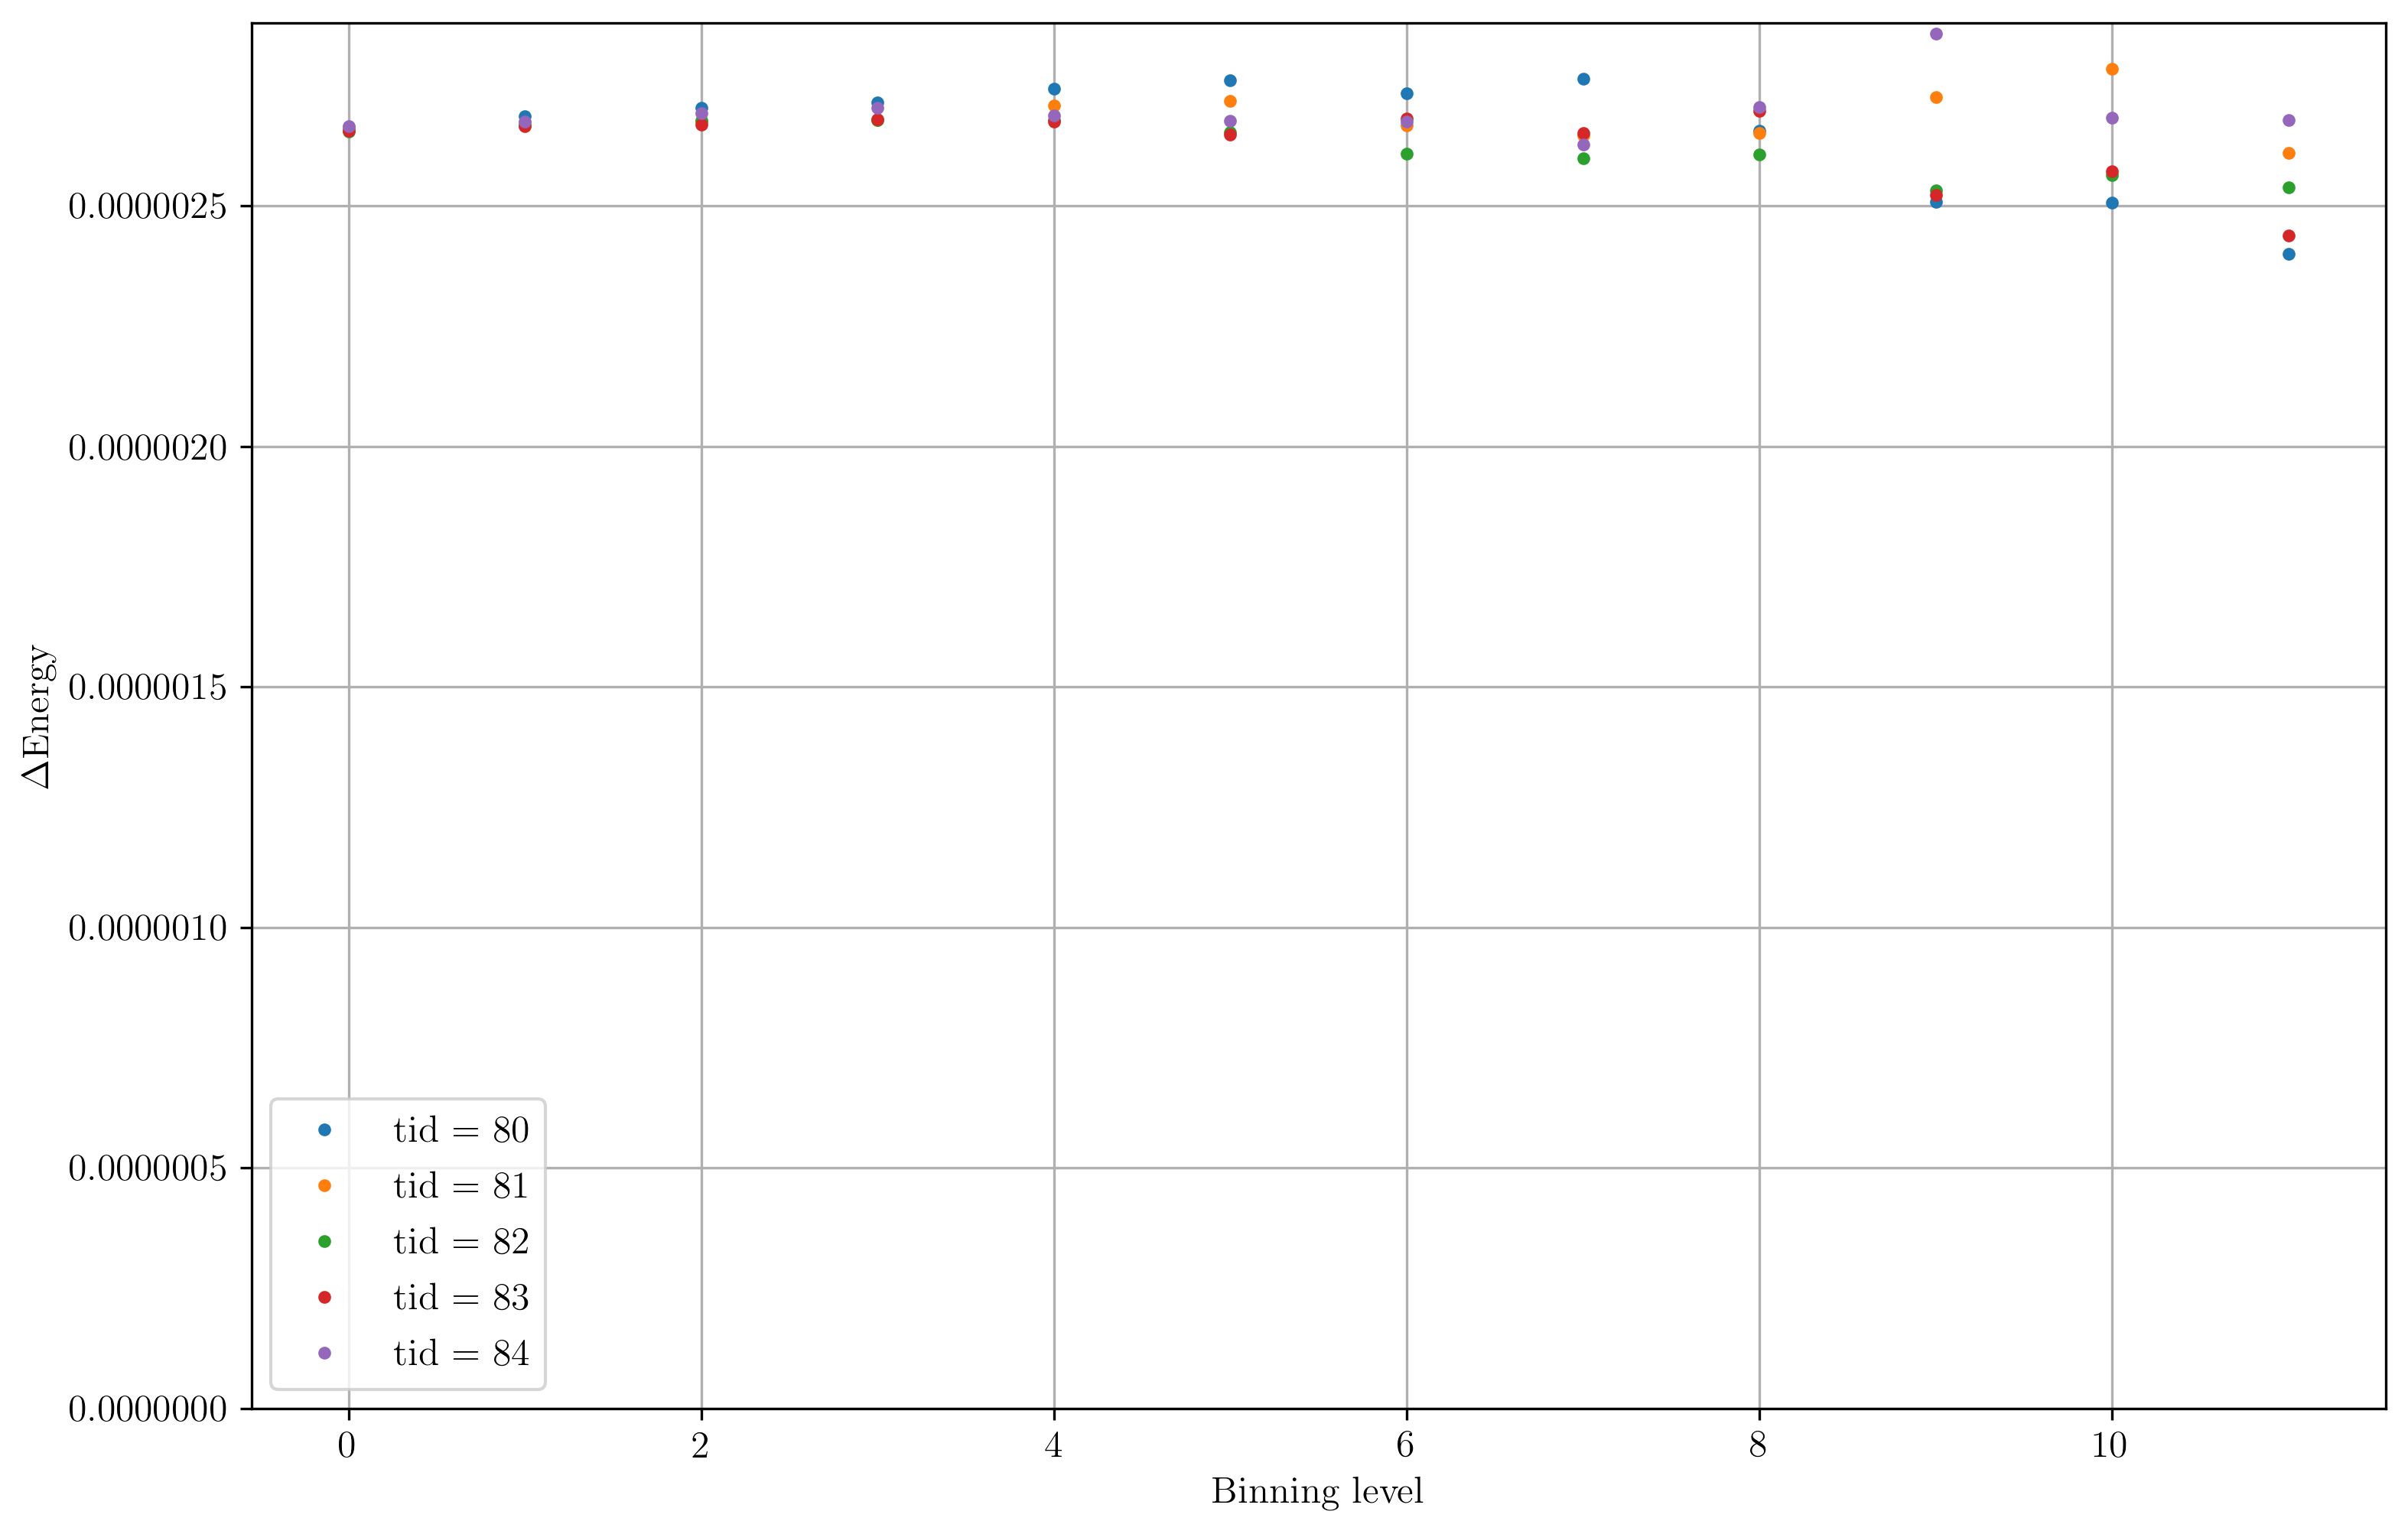

[-1.73333333]
Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


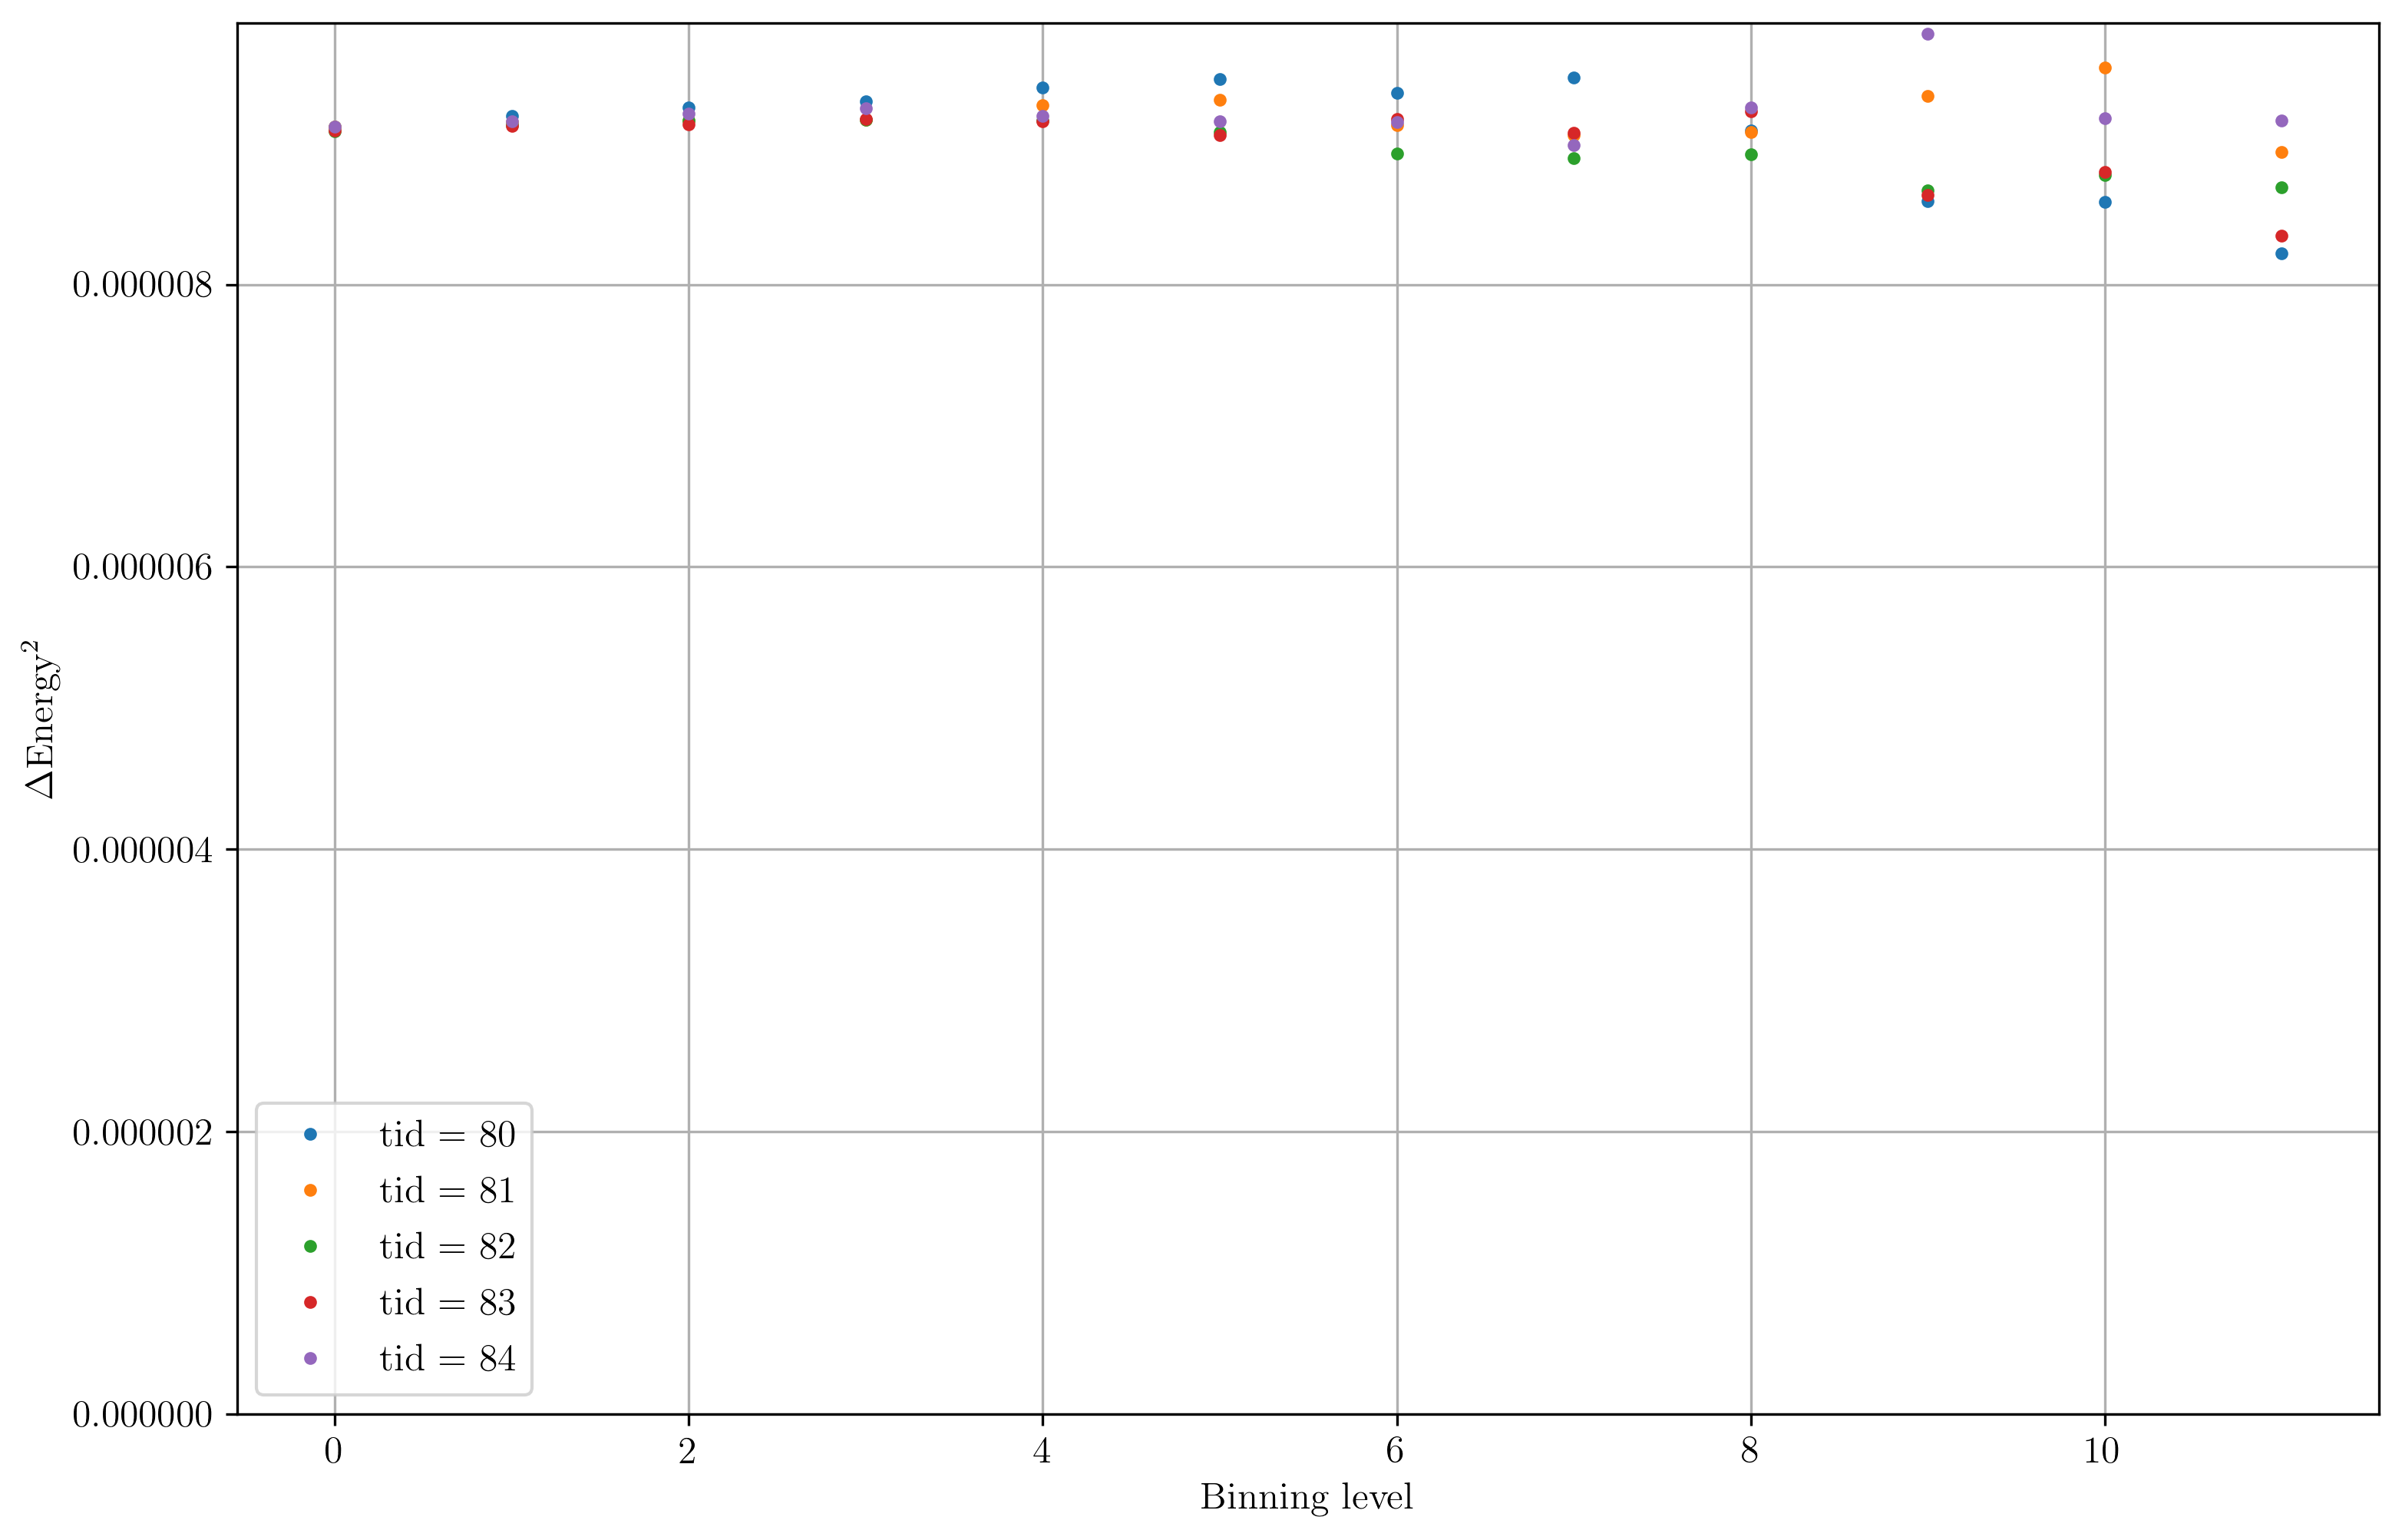

No jackknife analysis -- binning level:  2  -- number of bins:  32768
(131072, 2, 216, 1)


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:694: UserWarning: Negative variances num error: 5.978067E-12
  # set to zero


Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


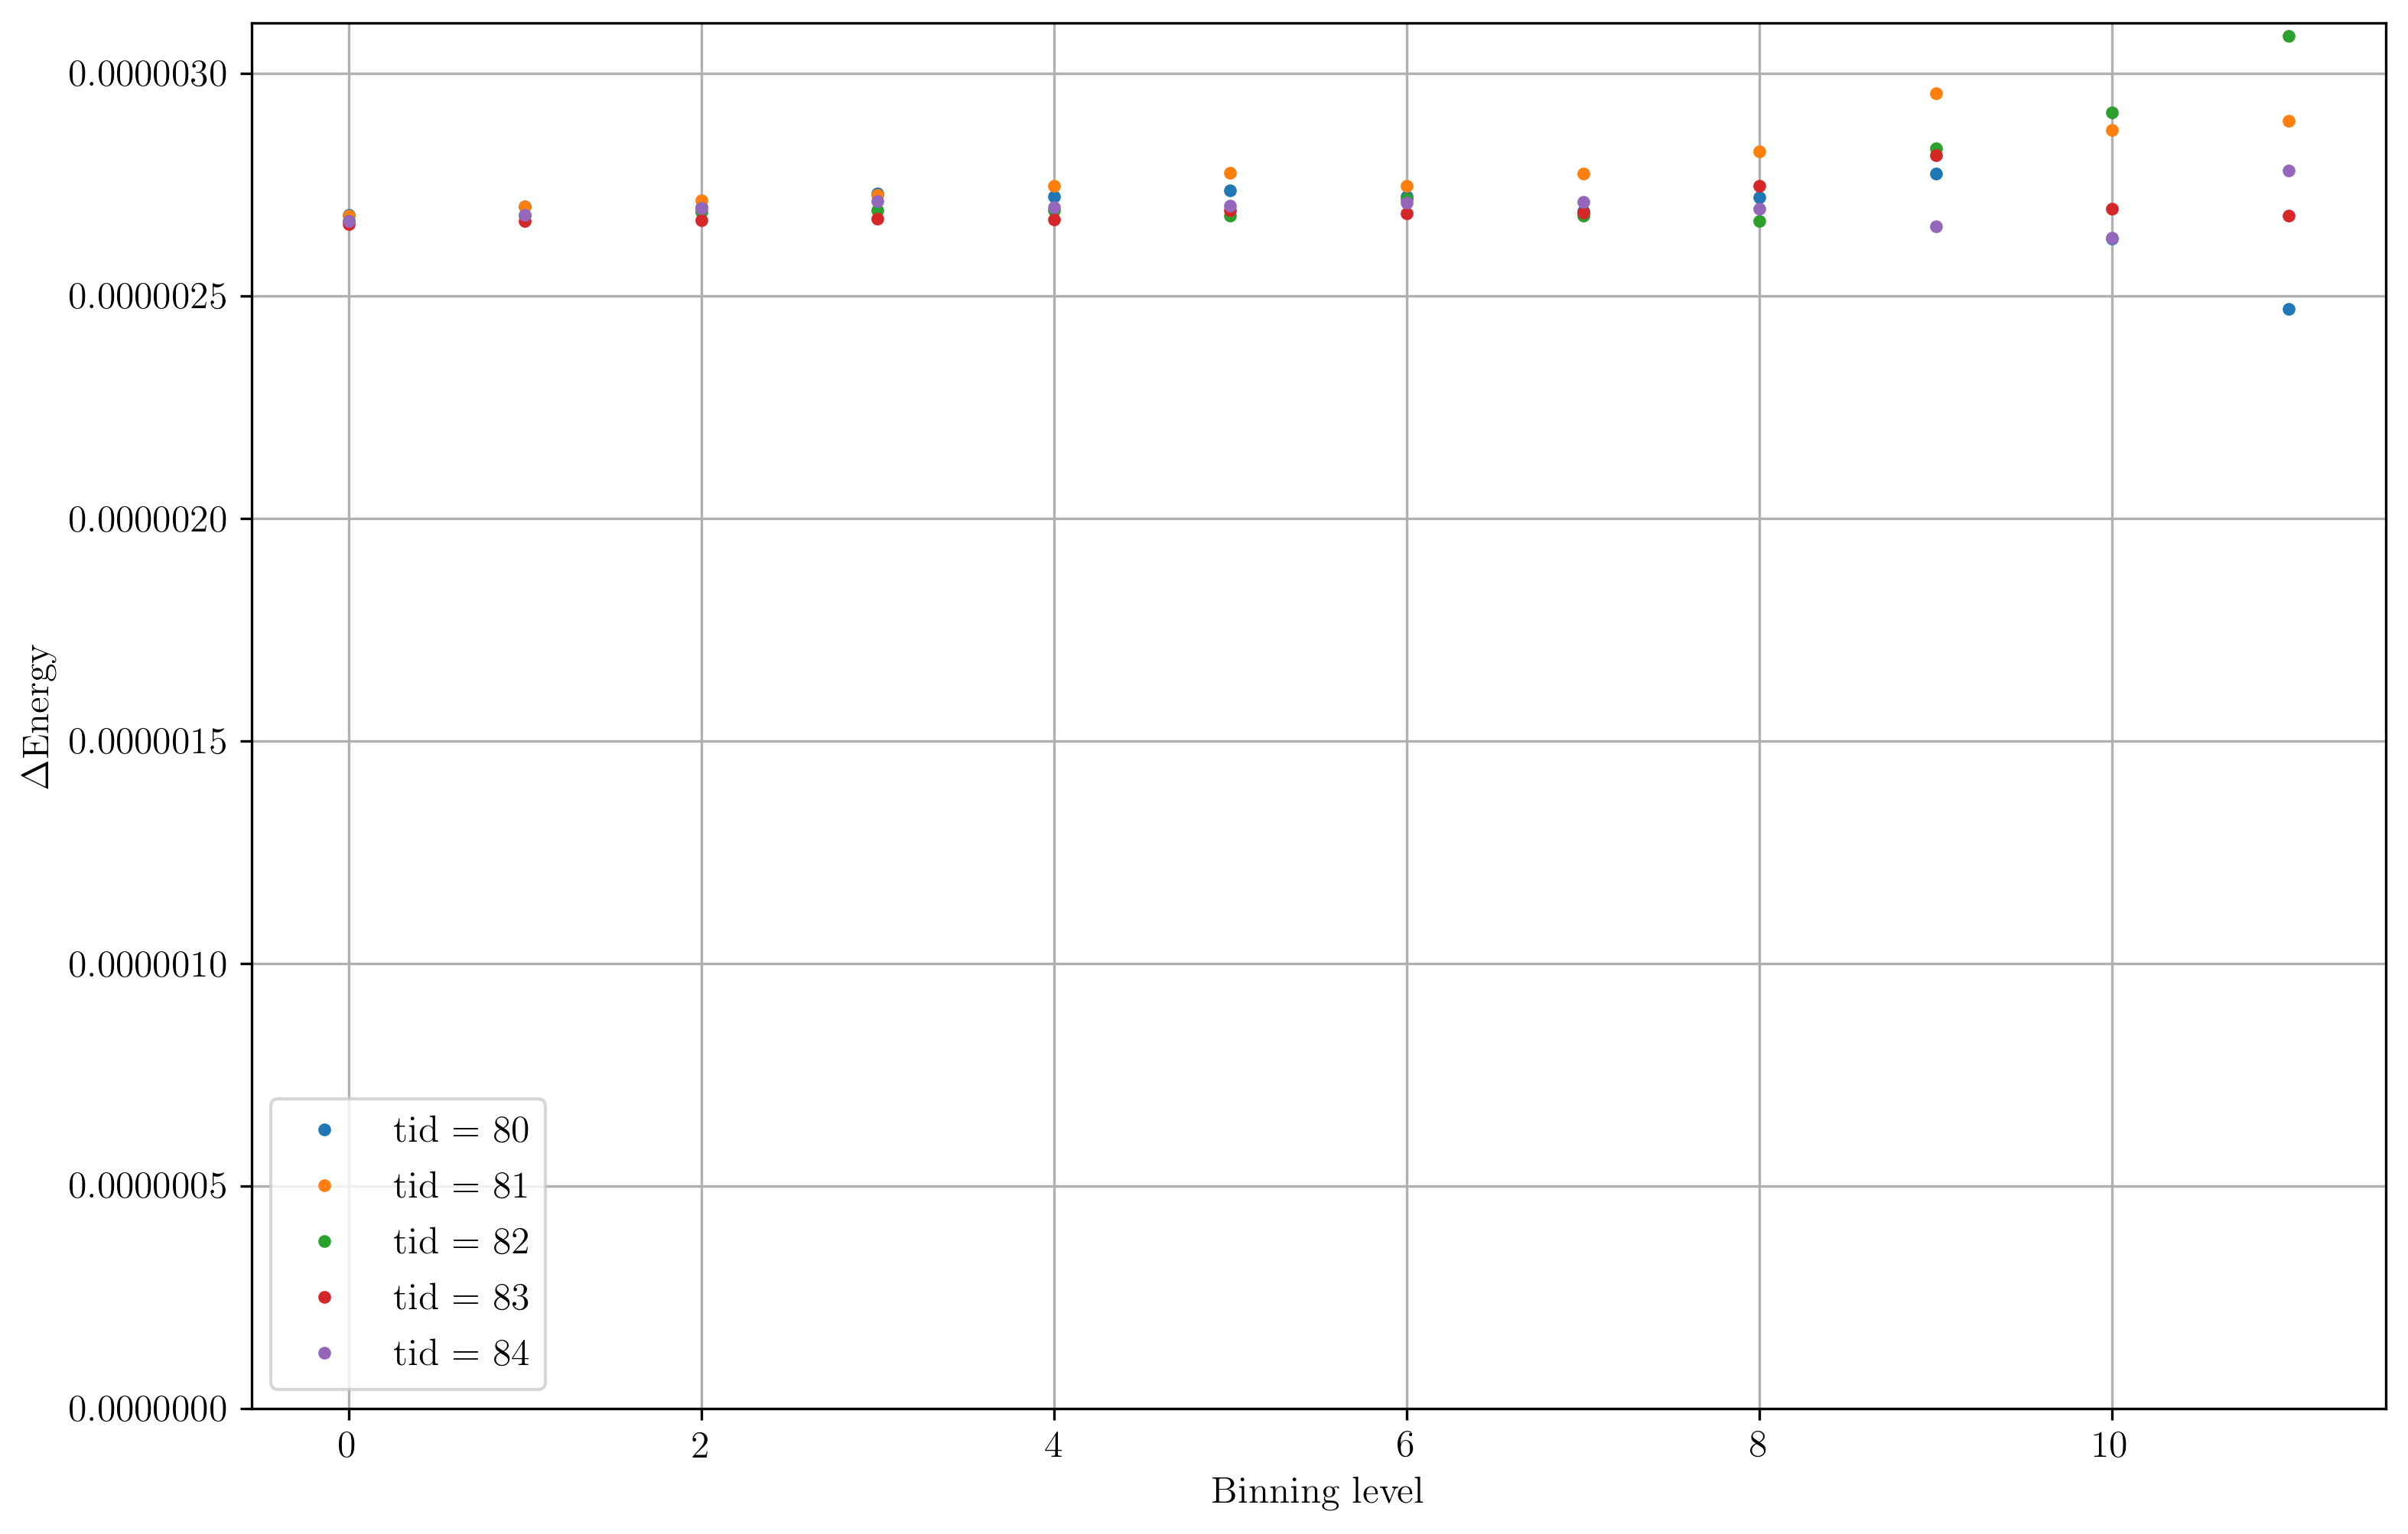

[-1.73333333]
Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


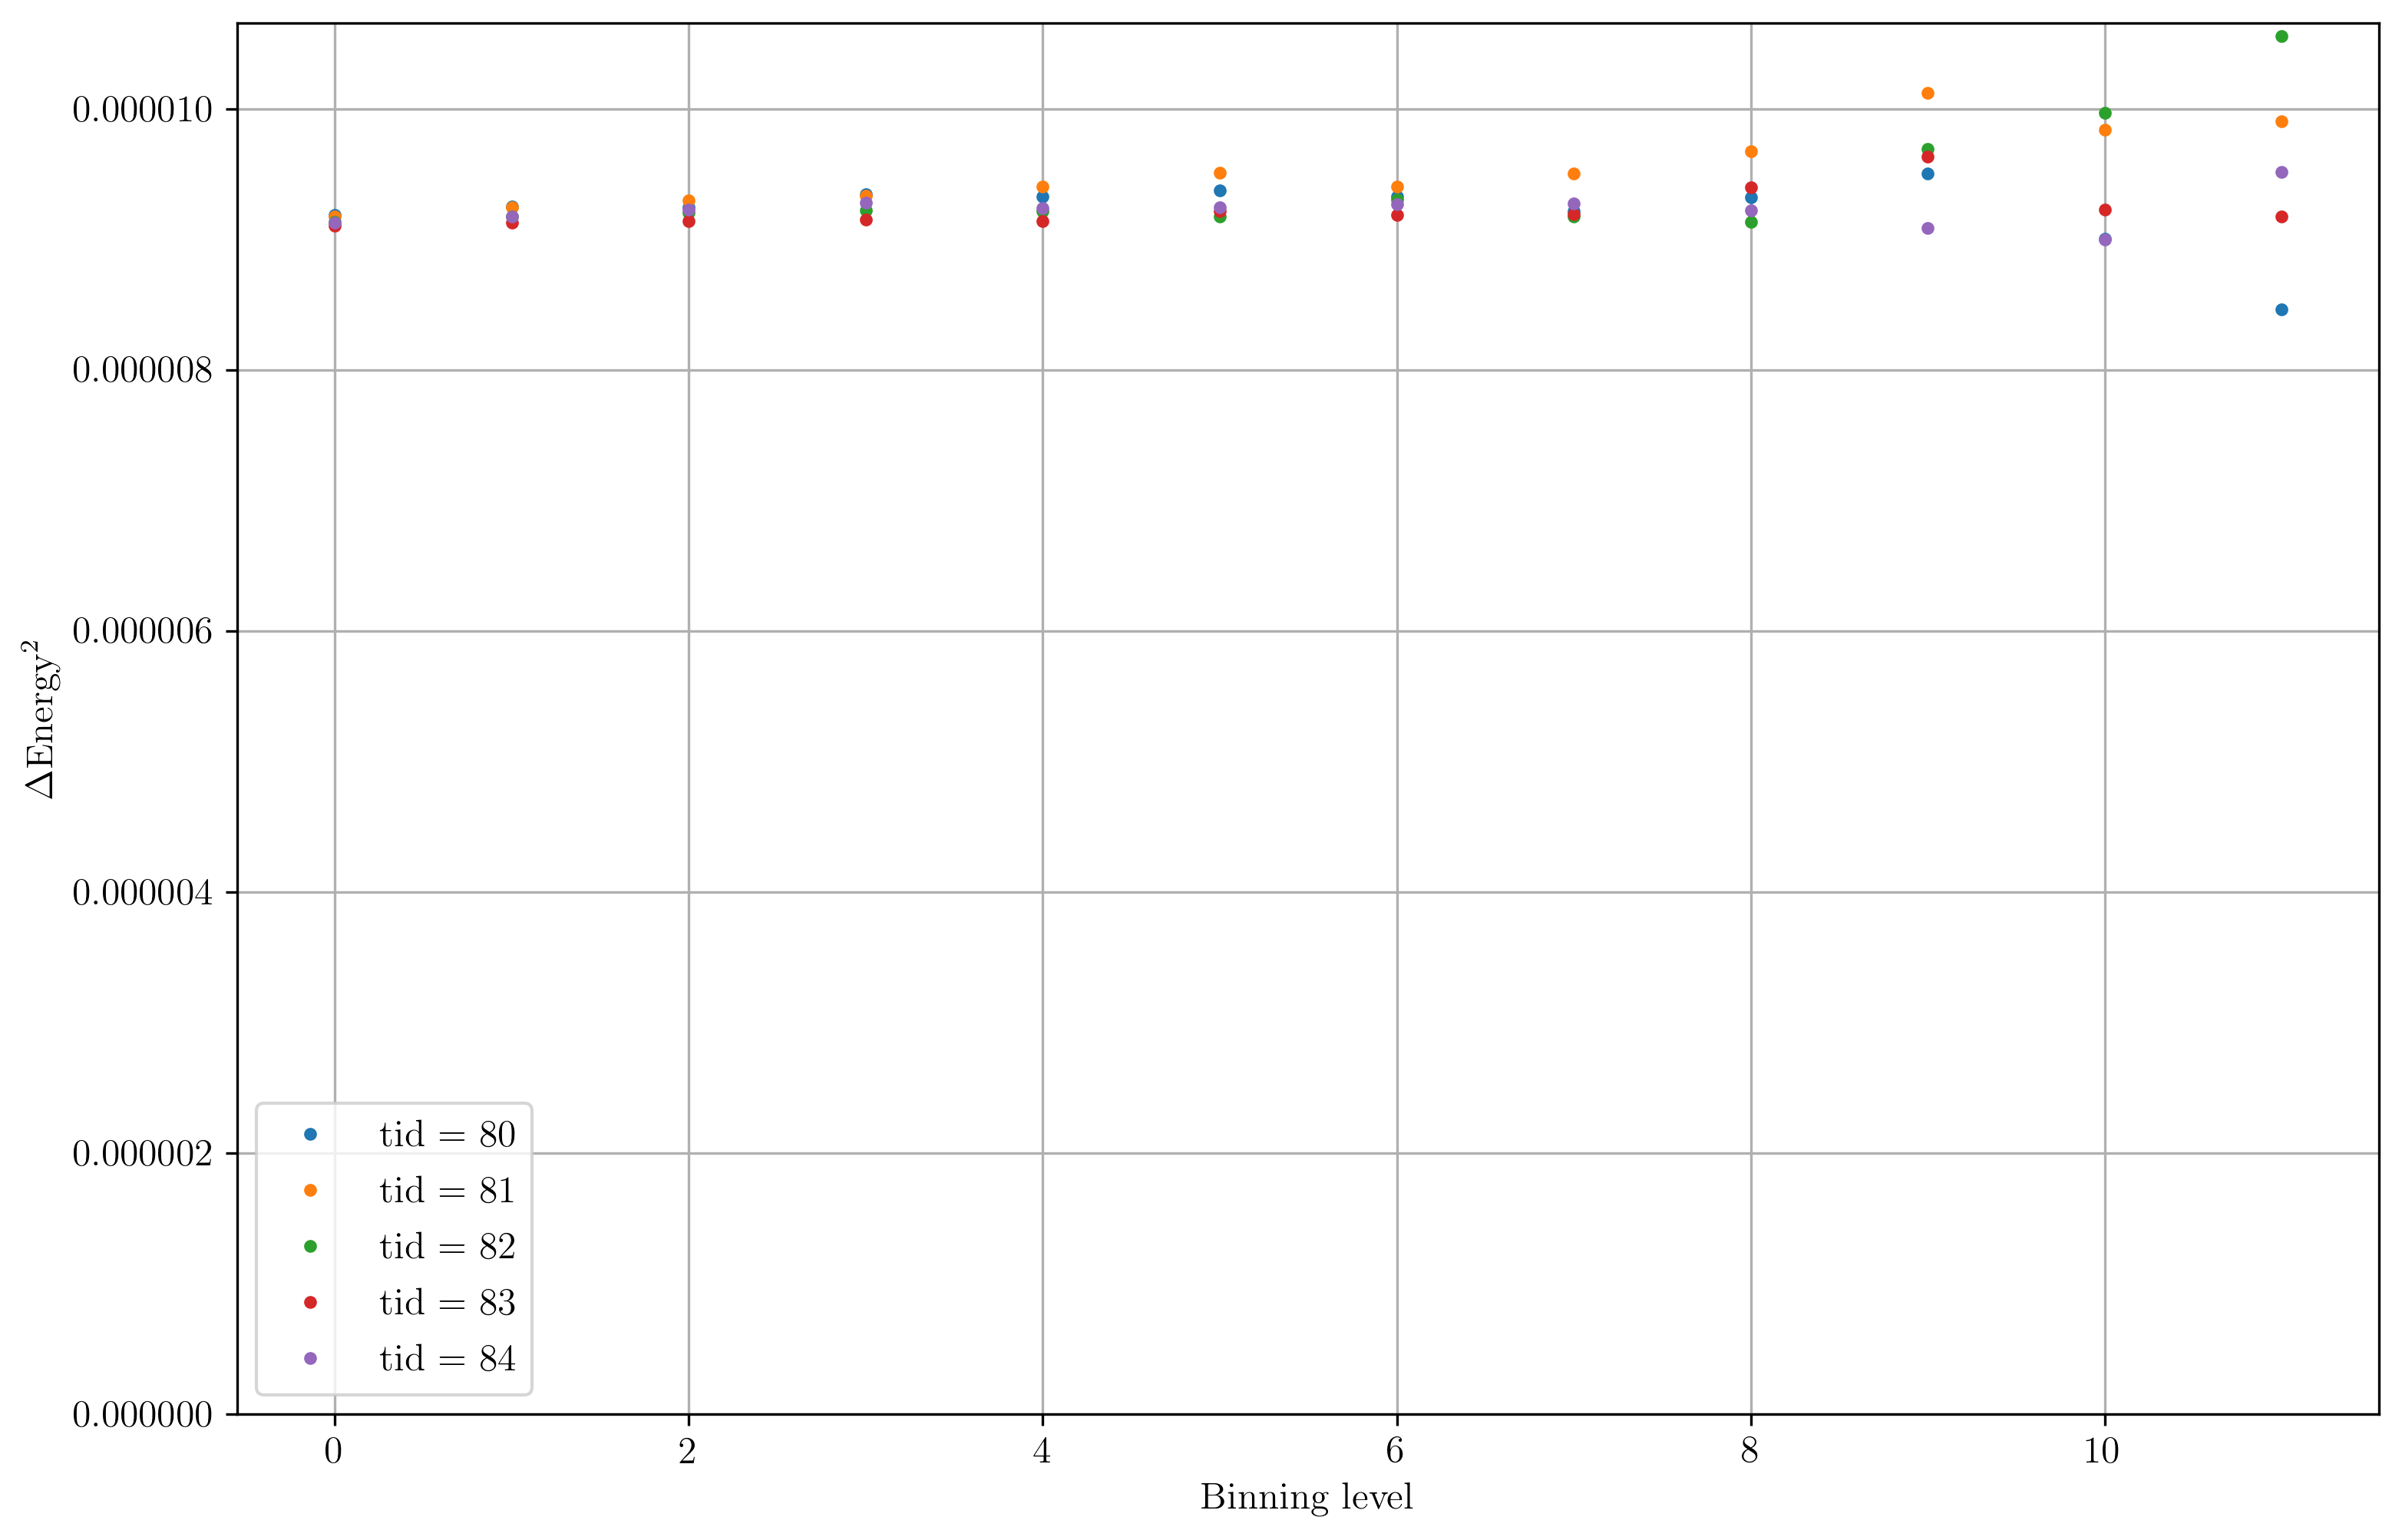

No jackknife analysis -- binning level:  2  -- number of bins:  32768
(131072, 2, 216, 1)


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:694: UserWarning: Negative variances num error: 5.470902E-12
  # set to zero


Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


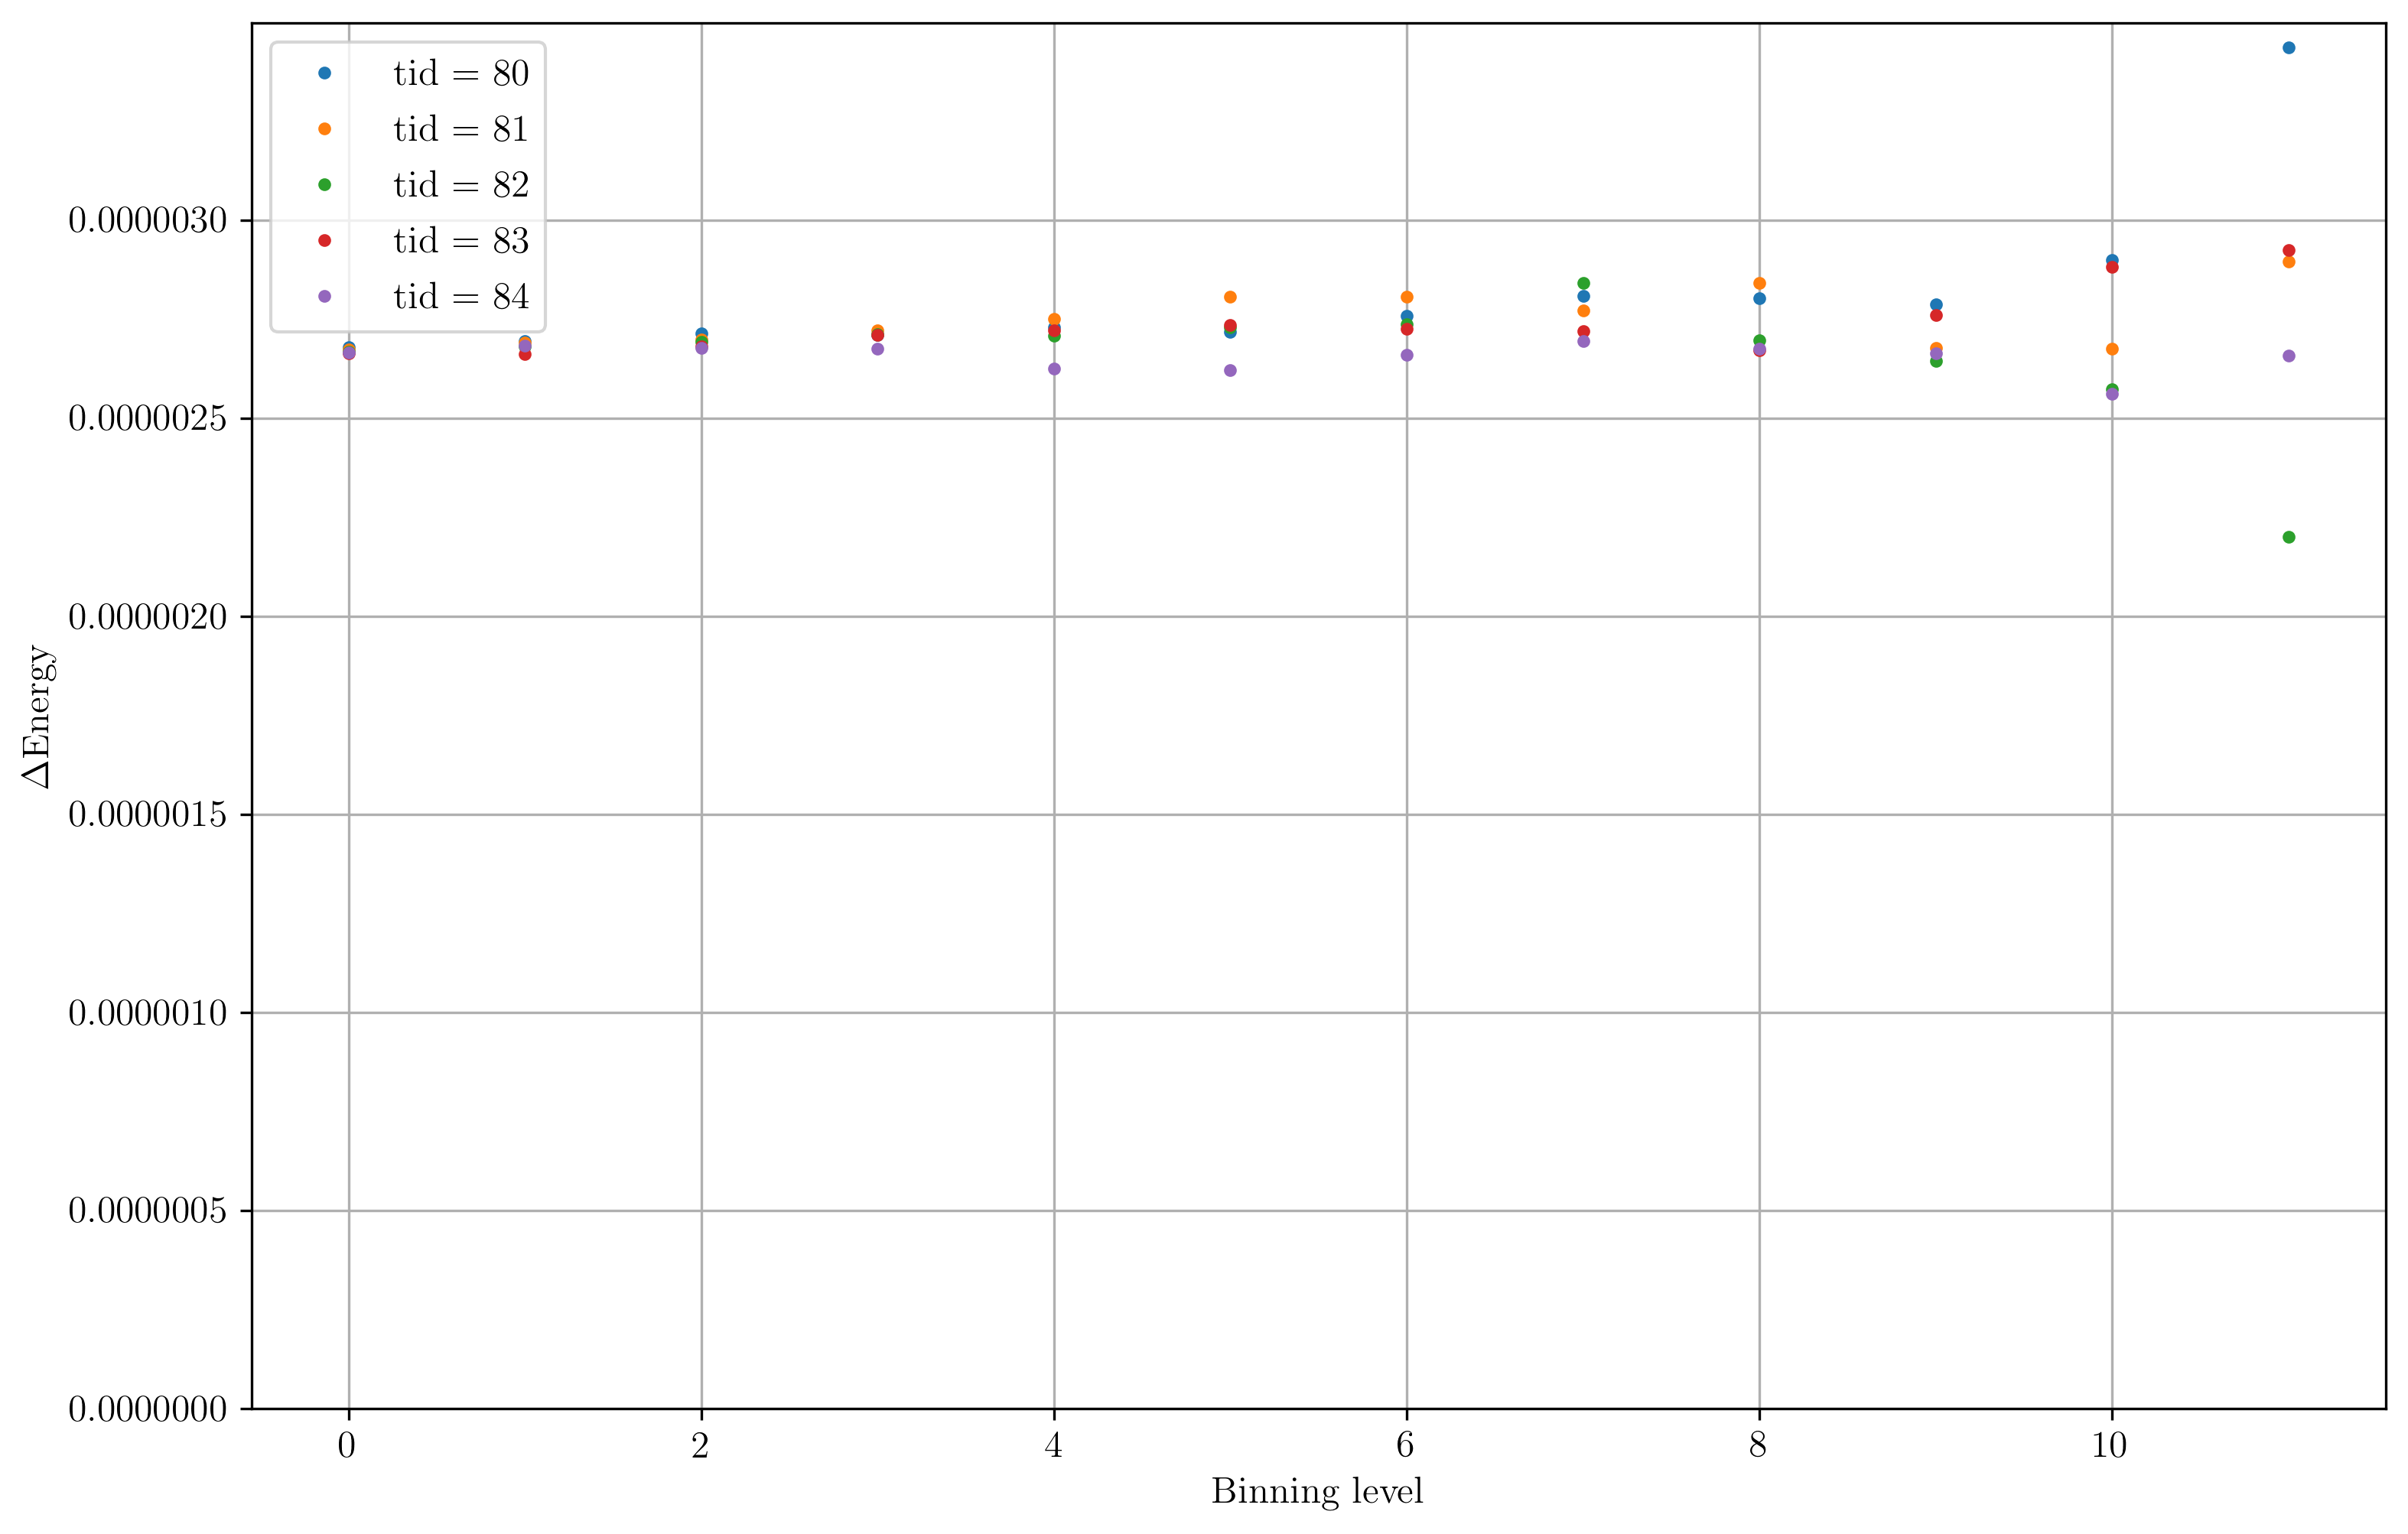

[-1.73333333]
Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


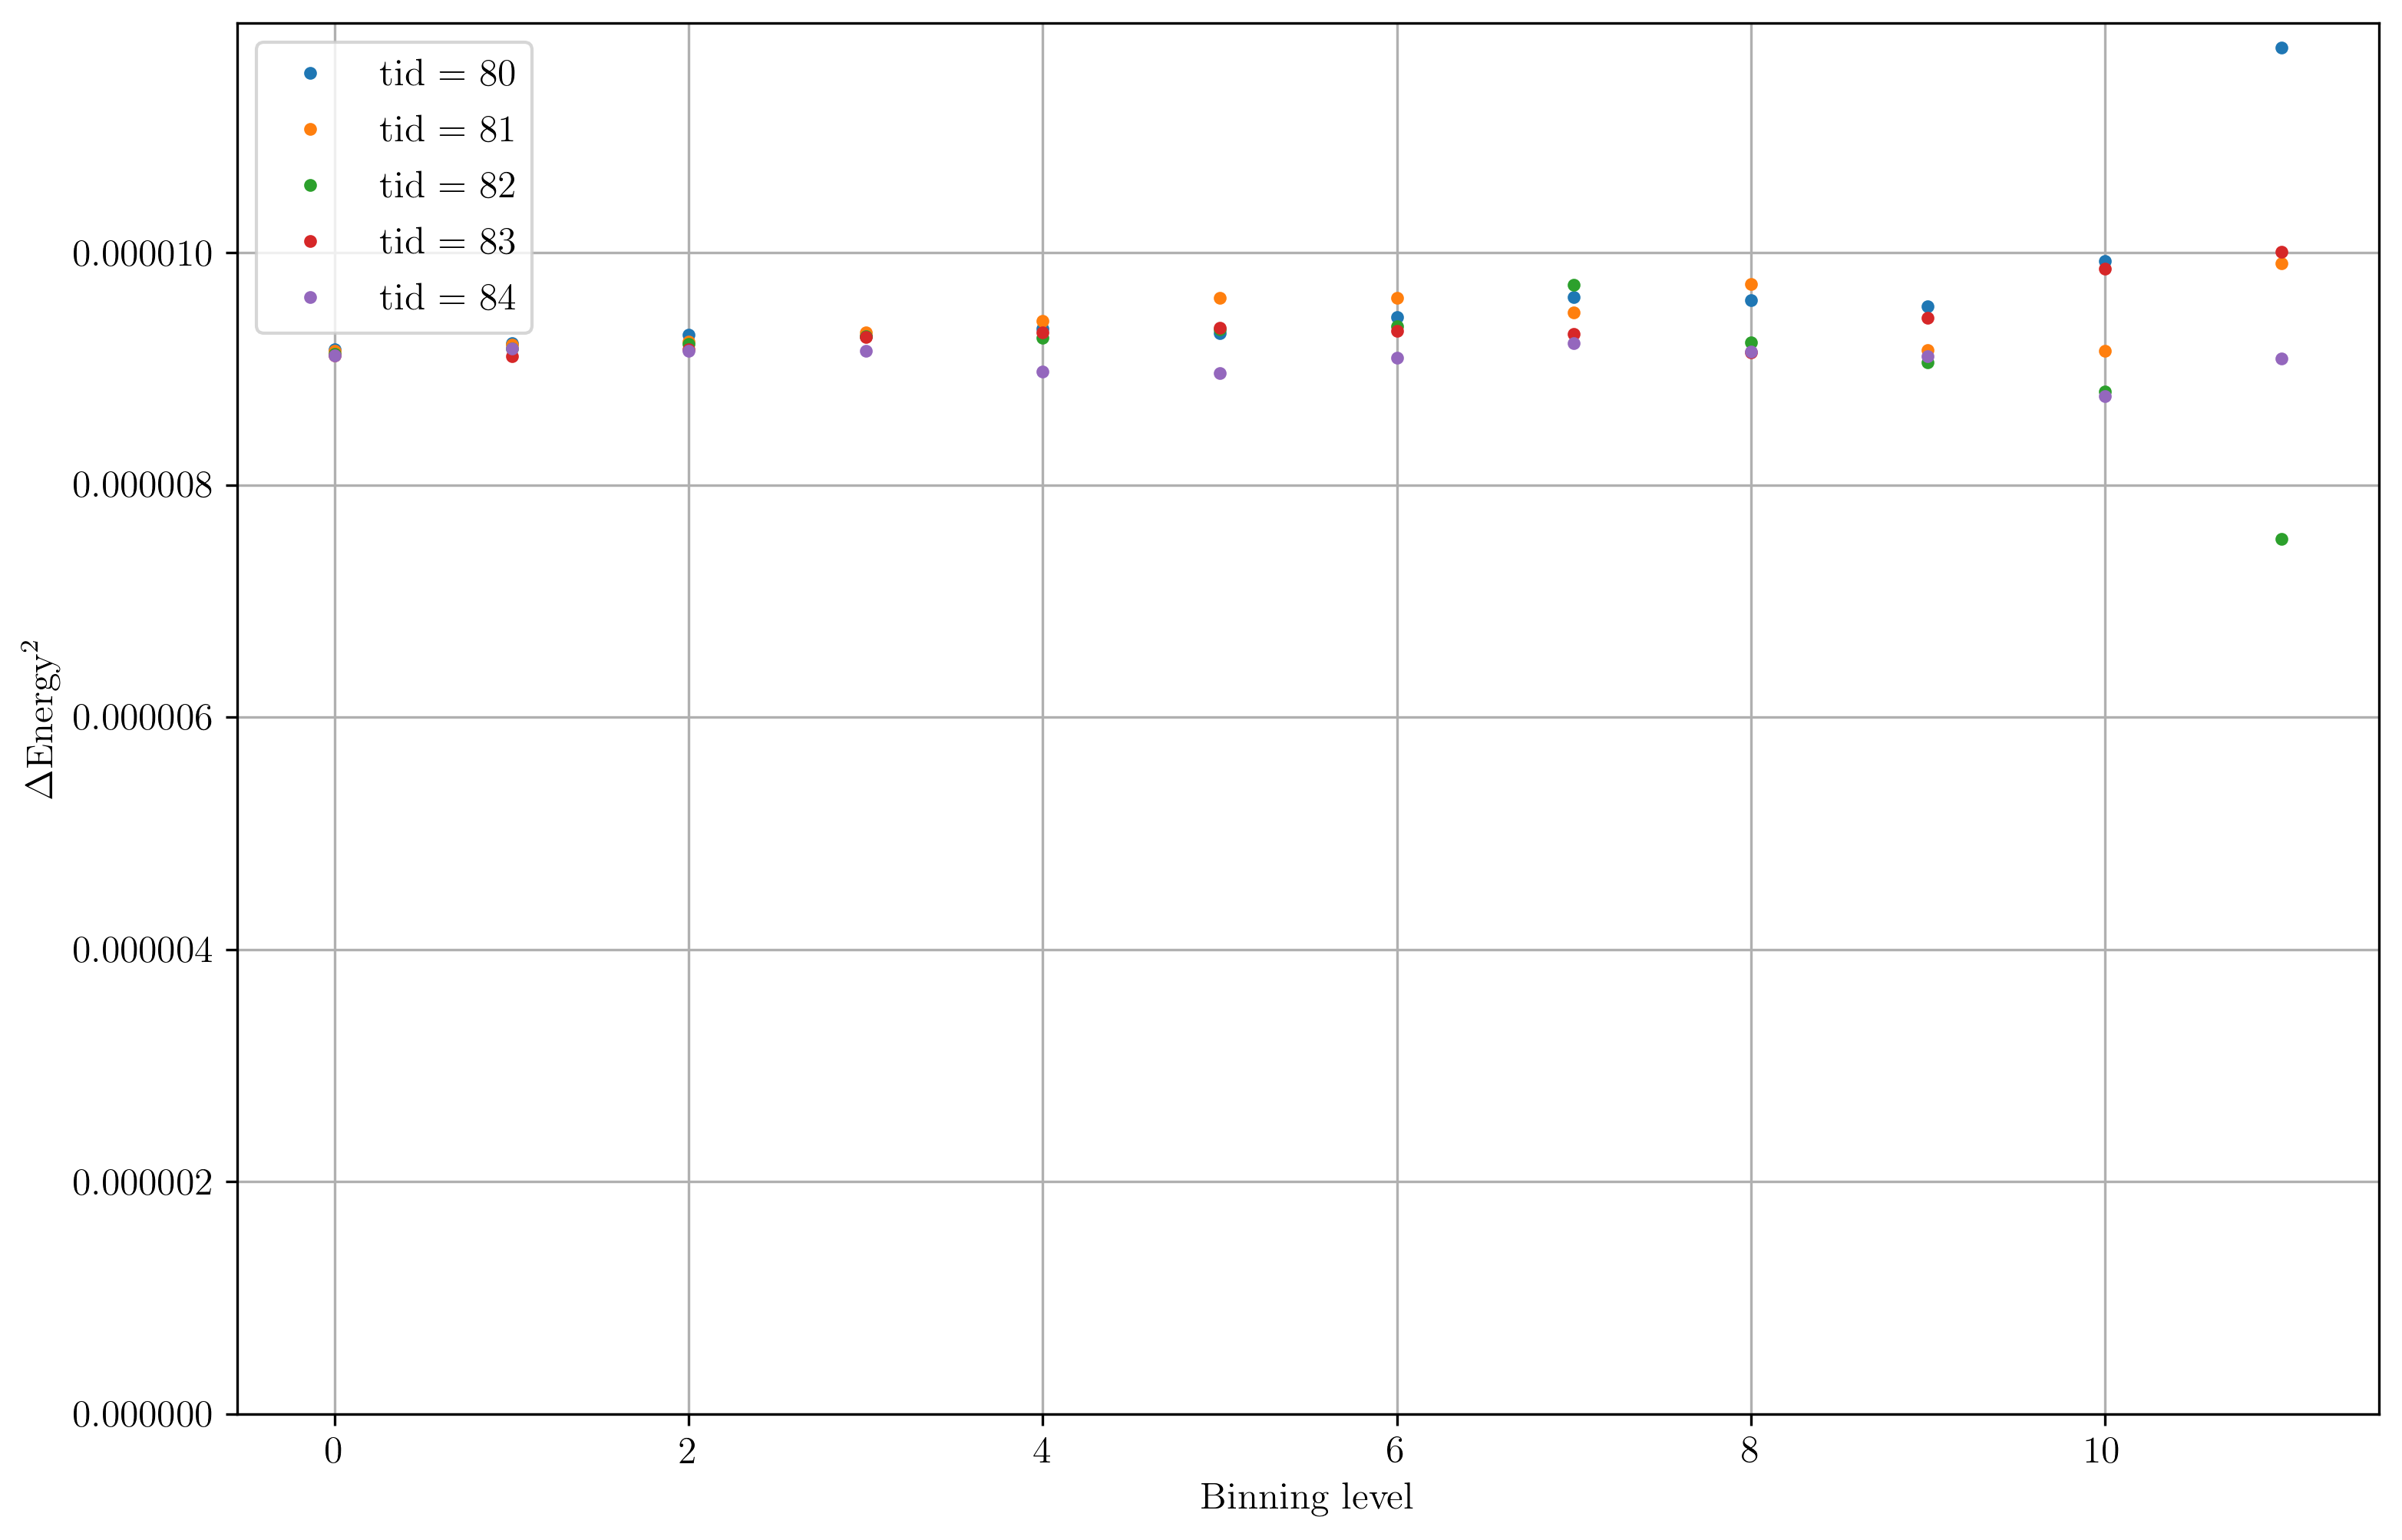

No jackknife analysis -- binning level:  2  -- number of bins:  32768
(131072, 2, 216, 1)


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:694: UserWarning: Negative variances num error: 4.586249E-12
  # set to zero


Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


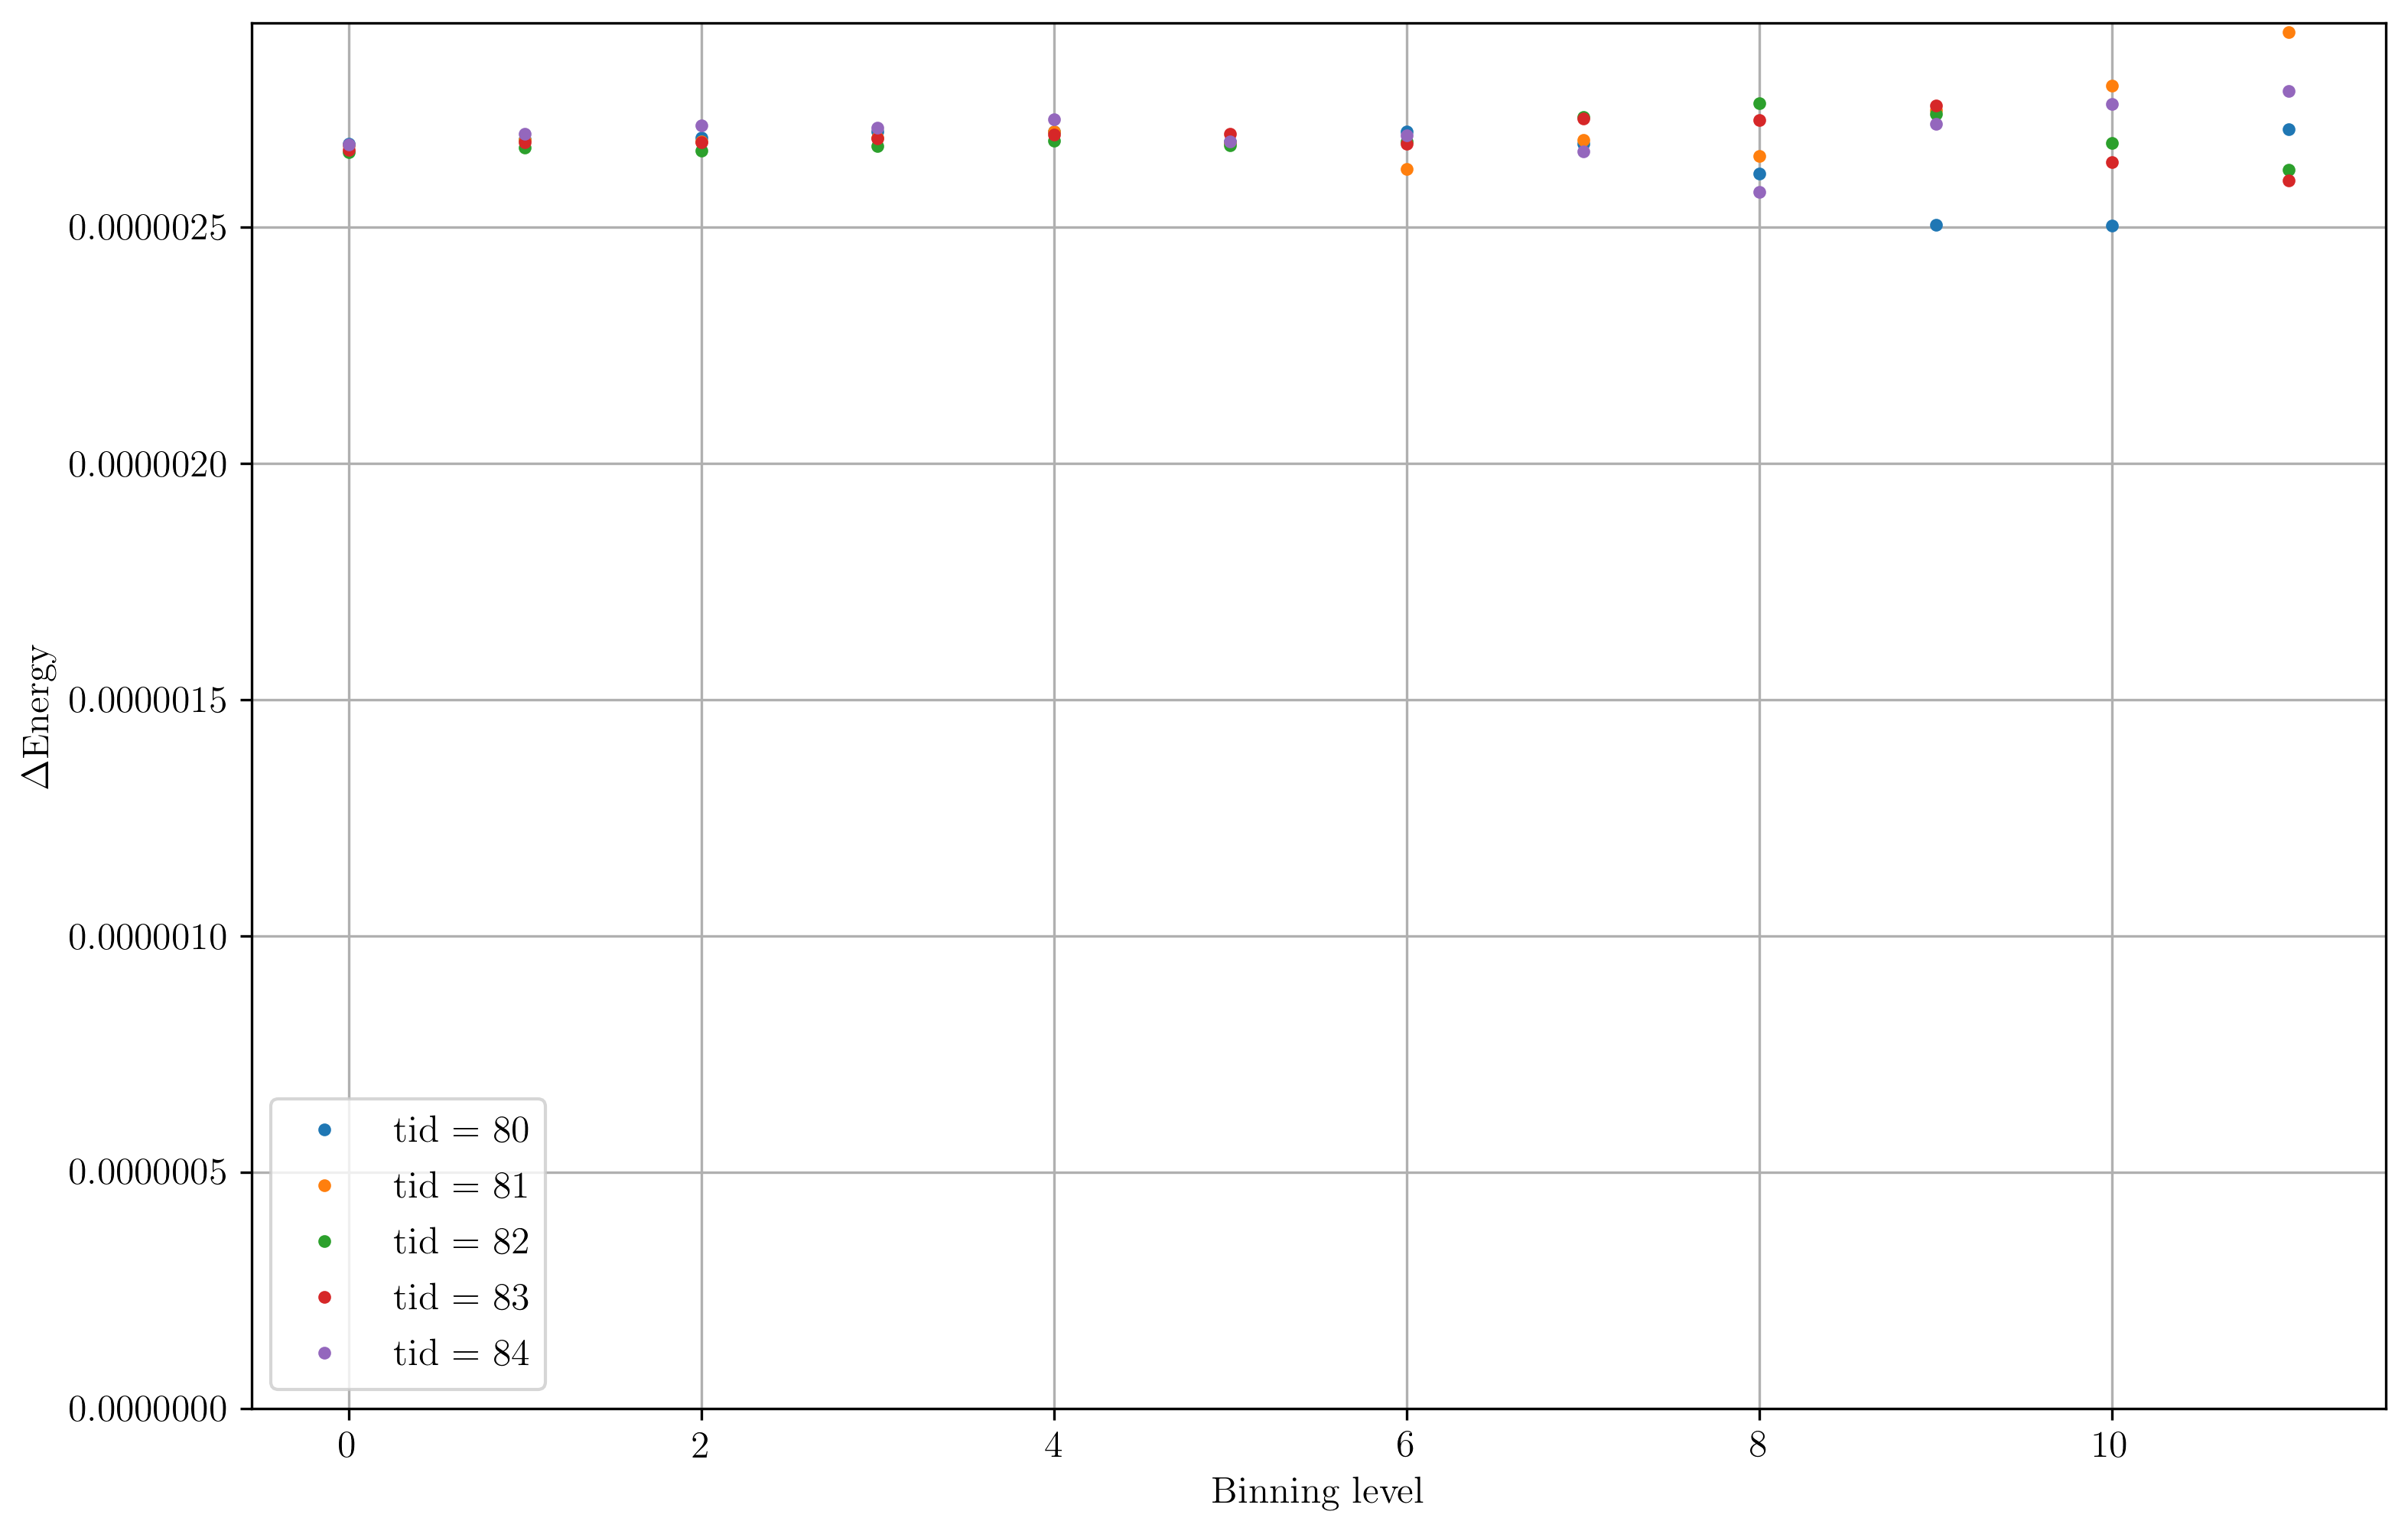

[-1.73333333]
Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


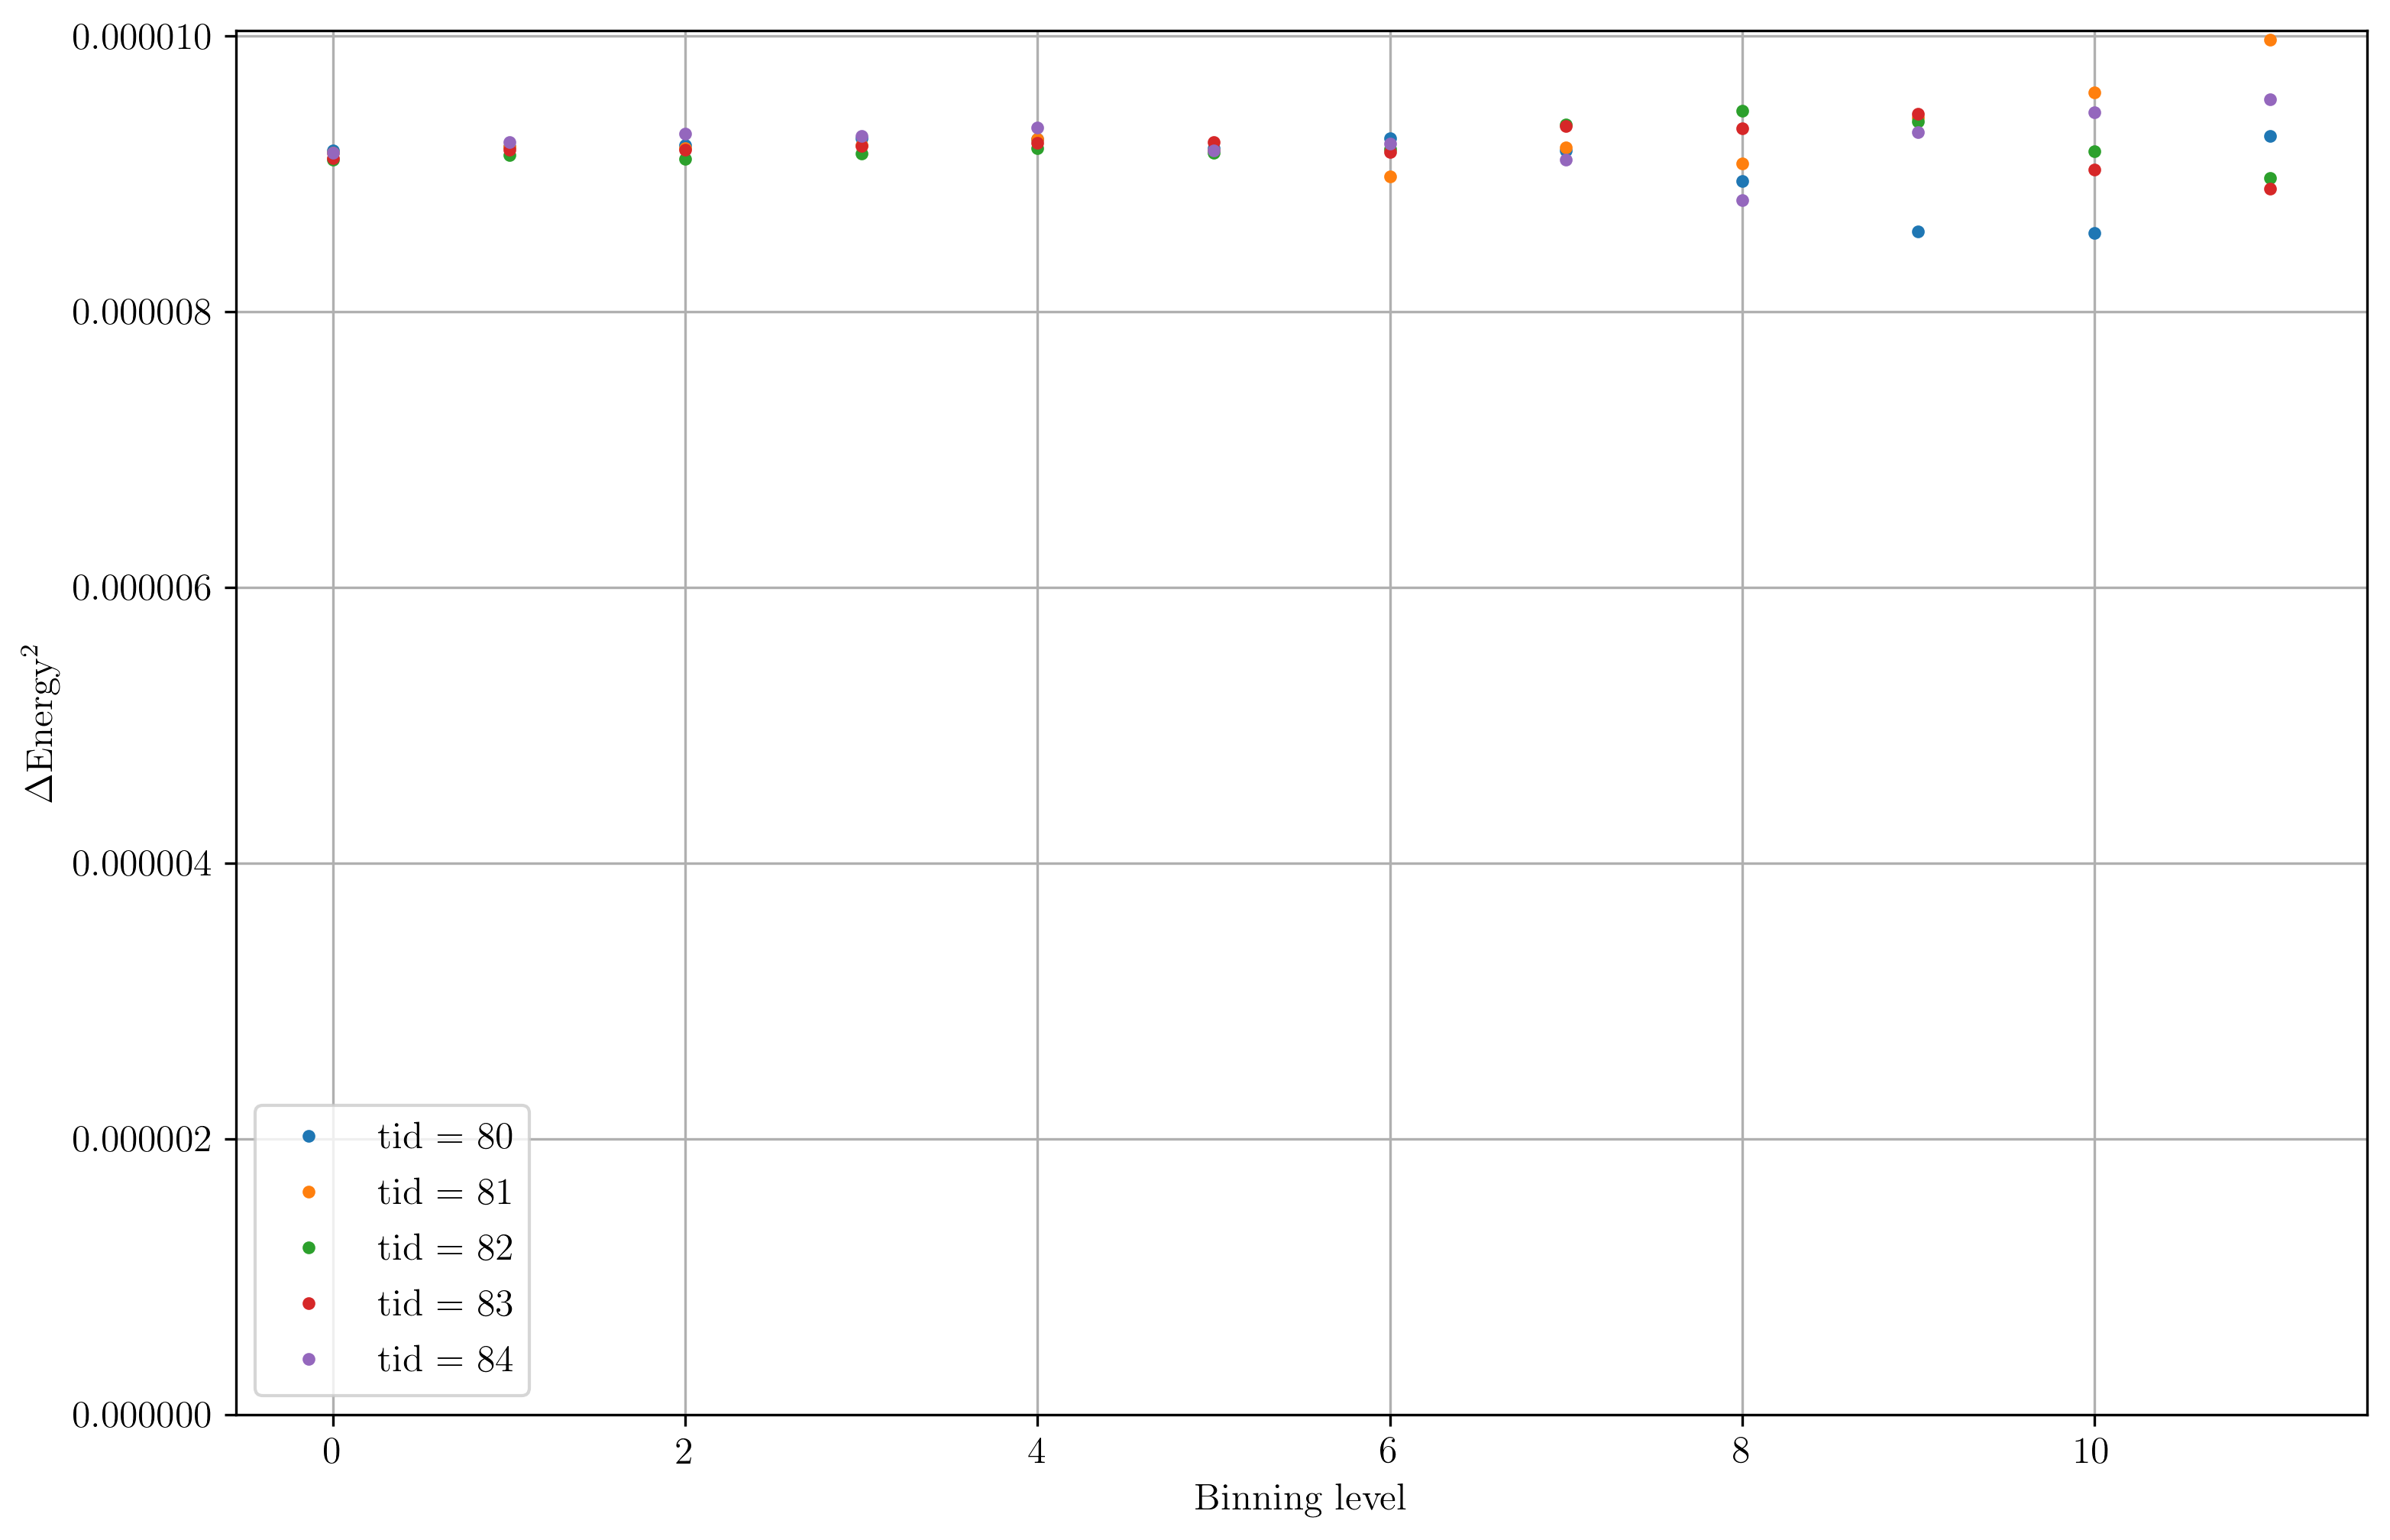

No jackknife analysis -- binning level:  2  -- number of bins:  32768
(131072, 2, 216, 1)


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:694: UserWarning: Negative variances num error: 5.723152E-12
  # set to zero


In [40]:
kw = {'binning':True, 'plzplot': True, 'minbin':63, 'RS':True, 
      'S0':np.log(2), 'mergeruns':mergeruns, 'nb_drop':nb_drop,
     'plotmin':80, 'plotmax':85, 'binning_level':2, 'jackknife': False}
[t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq, t_h_VarE, t_h_ErrVarE, C, ErrC,
 t_h_S, t_h_Smin, t_h_Smax, MergedData ] = \
 af.LoadEnergy(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

if mergeruns:
    [t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq, C, ErrC,
 t_h_S, t_h_Smin, t_h_Smax] = MergedData

In [22]:
#t_MeanM, t_MeanMsq, t_varMeanM, t_varMeanMsq, Chi, ErrChi = \
# af.LoadMagnetisation(foldername, filenamelist, numsites, nb,
#                      stat_temps, temperatures, listfunctions, **kw)

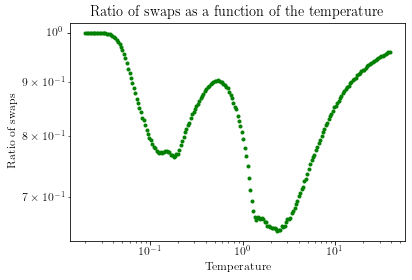

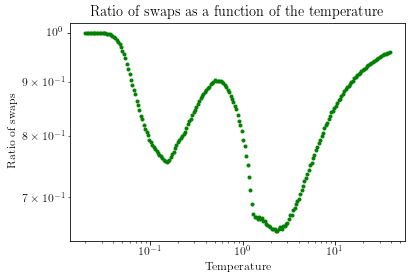

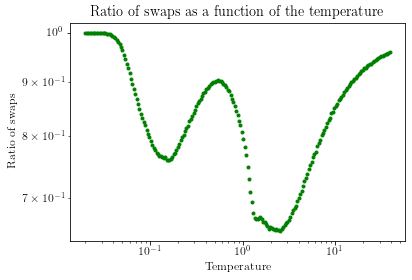

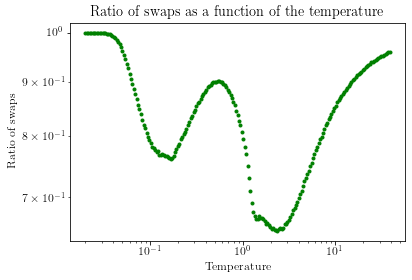

In [23]:
###########################################
        ## ALGORITHM ANALYSIS ##
###########################################
tidmin = 0
tidmax = nt
af.SwapsAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername, swapst, swapsh)

In [33]:
failedssf

[array([[-0.59868326],
        [-0.59868738],
        [-0.59868331],
        [-0.59868327],
        [-0.59868293],
        [-0.59868779],
        [-0.59868774],
        [-0.59868689],
        [-0.59868882],
        [-0.59868547],
        [-0.59868855],
        [-0.5986848 ],
        [-0.59868698],
        [-0.59868222],
        [-0.59868516],
        [-0.59868457],
        [-0.5986915 ],
        [-0.59870361],
        [-0.59870768],
        [-0.59871674],
        [-0.59873845],
        [-0.59875837],
        [-0.5987883 ],
        [-0.59881876],
        [-0.5988704 ],
        [-0.59893147],
        [-0.59902303],
        [-0.59912435],
        [-0.59926616],
        [-0.59944127],
        [-0.59964494],
        [-0.59990389],
        [-0.60023811],
        [-0.60061188],
        [-0.60108573],
        [-0.60163306],
        [-0.60230057],
        [-0.60305145],
        [-0.60395486],
        [-0.60498295],
        [-0.60614205],
        [-0.60751013],
        [-0.60903102],
        [-0

In [34]:
failedssfth

[array([[0.98177471],
        [0.98176505],
        [0.98176476],
        [0.9817511 ],
        [0.98174946],
        [0.9817463 ],
        [0.98174576],
        [0.98174557],
        [0.98176277],
        [0.98174418],
        [0.98174415],
        [0.98173966],
        [0.98174104],
        [0.98172747],
        [0.98170942],
        [0.98170383],
        [0.98170205],
        [0.98169365],
        [0.98168145],
        [0.98166651],
        [0.98165426],
        [0.98163193],
        [0.9815943 ],
        [0.98155769],
        [0.98148811],
        [0.98142876],
        [0.98133127],
        [0.98121784],
        [0.98111679],
        [0.98094186],
        [0.98073499],
        [0.98048682],
        [0.98017144],
        [0.97978284],
        [0.97930131],
        [0.97874014],
        [0.97808903],
        [0.97731031],
        [0.97640327],
        [0.97530009],
        [0.97409146],
        [0.97280074],
        [0.97124322],
        [0.96959034],
        [0.96764697],
        [0

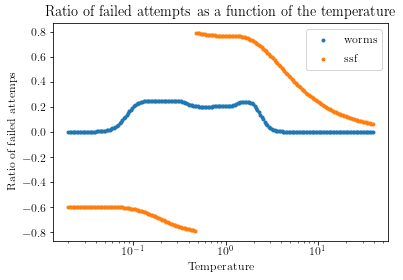

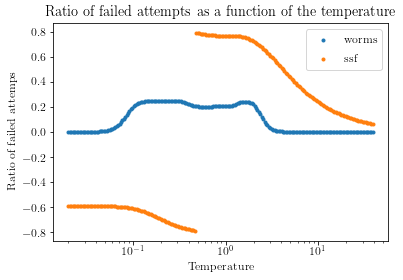

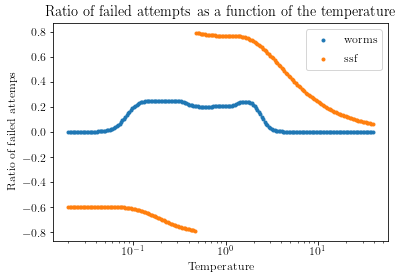

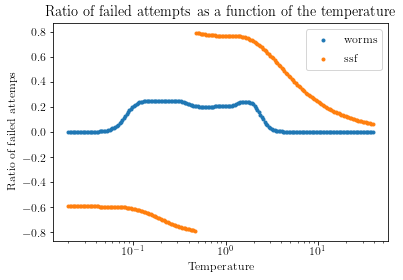

In [42]:
af.FailedAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername,failedth, failedssf)

In [25]:
import importlib
importlib.reload(af)

<module 'AnalysisFunctions' from '/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py'>

In [26]:
tidmin = 0
tidmax = [len(stat_temps[i]) for i in range(n)]
temperatures_plots = np.array(temperatures_plots)
S0 = np.log(2)
kw = {'gscheck': True, 'S0': S0, 'RS': True, 't_h_EntropyData': (t_h_S, t_h_Smin, t_h_Smax) }

print(t_h_Smin[0][0:5,0])
print(t_h_S[0][0:5,0])
print(t_h_Smax[0][0:5,0])

[0.10970006 0.10970006 0.10970006 0.10970006 0.10970006]
[0.11194541 0.11194541 0.11194541 0.11194541 0.11194541]
[0.11419077 0.11419077 0.11419077 0.11419077 0.11419077]


In [27]:
import matplotlib.font_manager
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Time New Roman'],'size':12})
rc('text', usetex=True)
import os
fm = matplotlib.font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v310.json"))

fm.findfont("serif", rebuild_if_missing=False)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

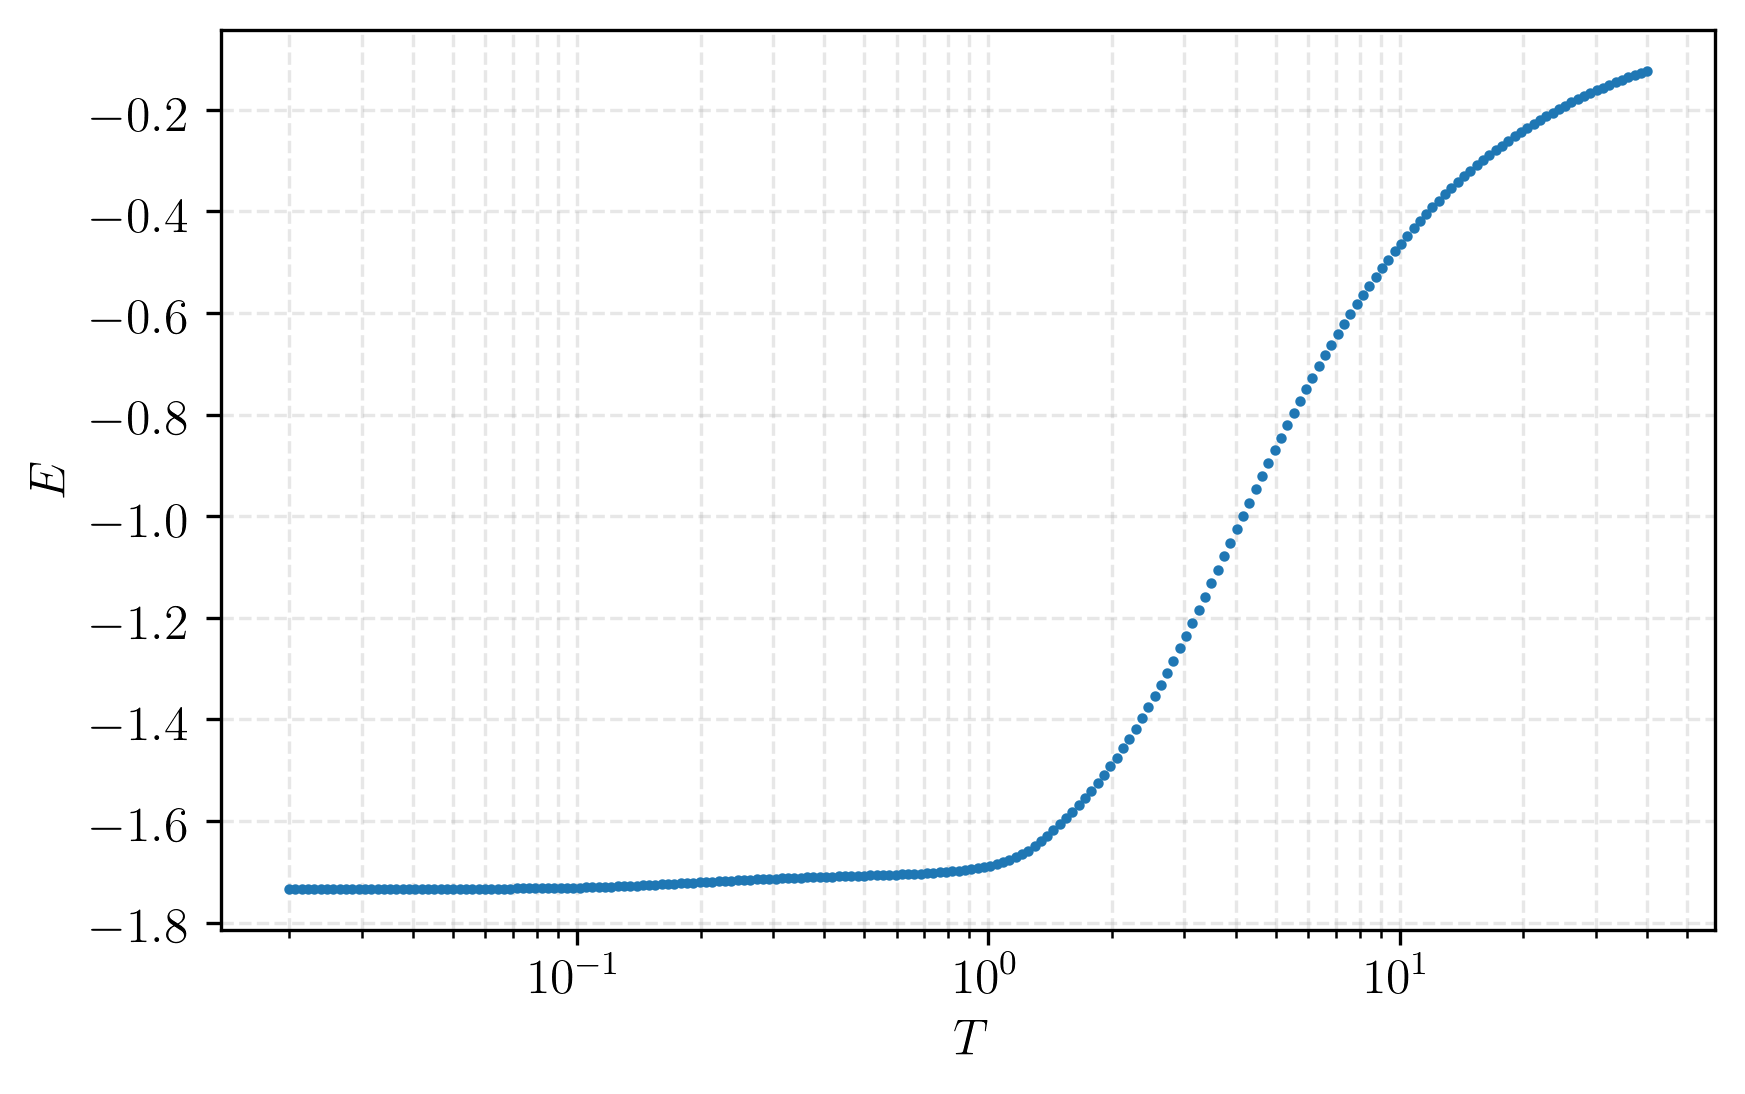

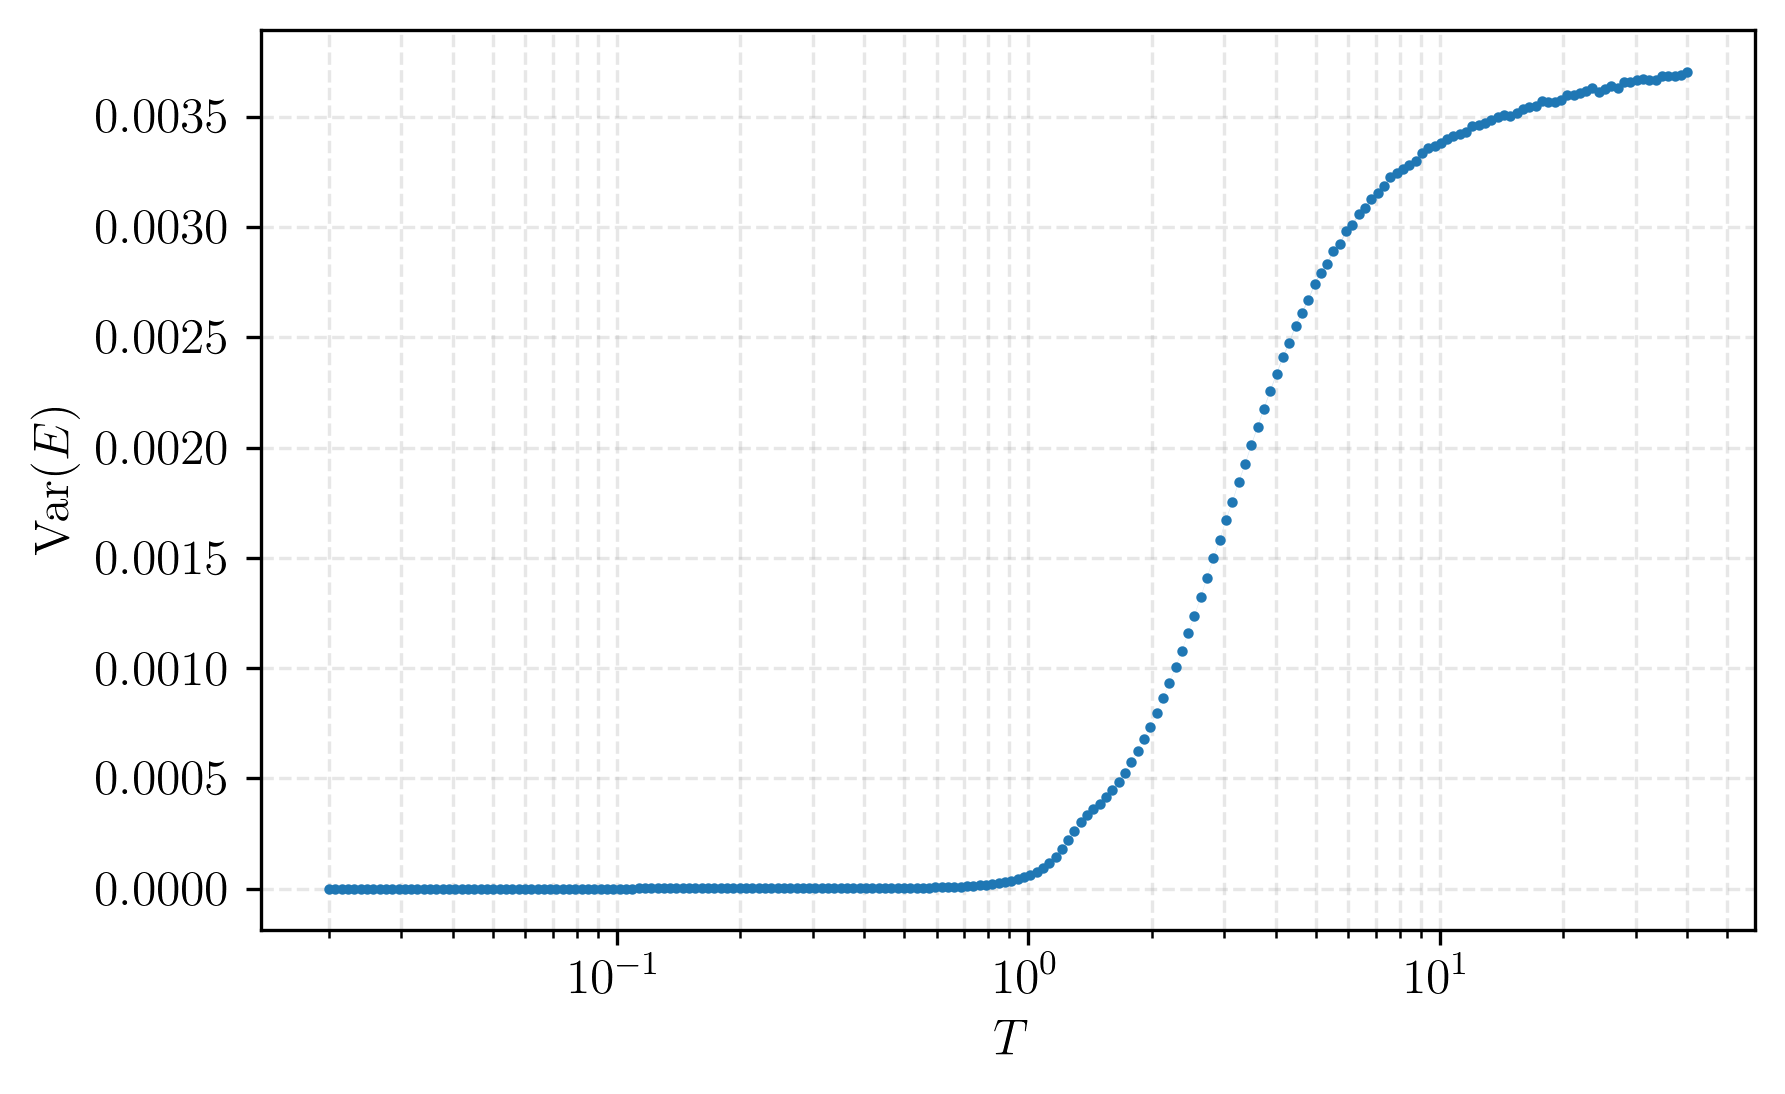

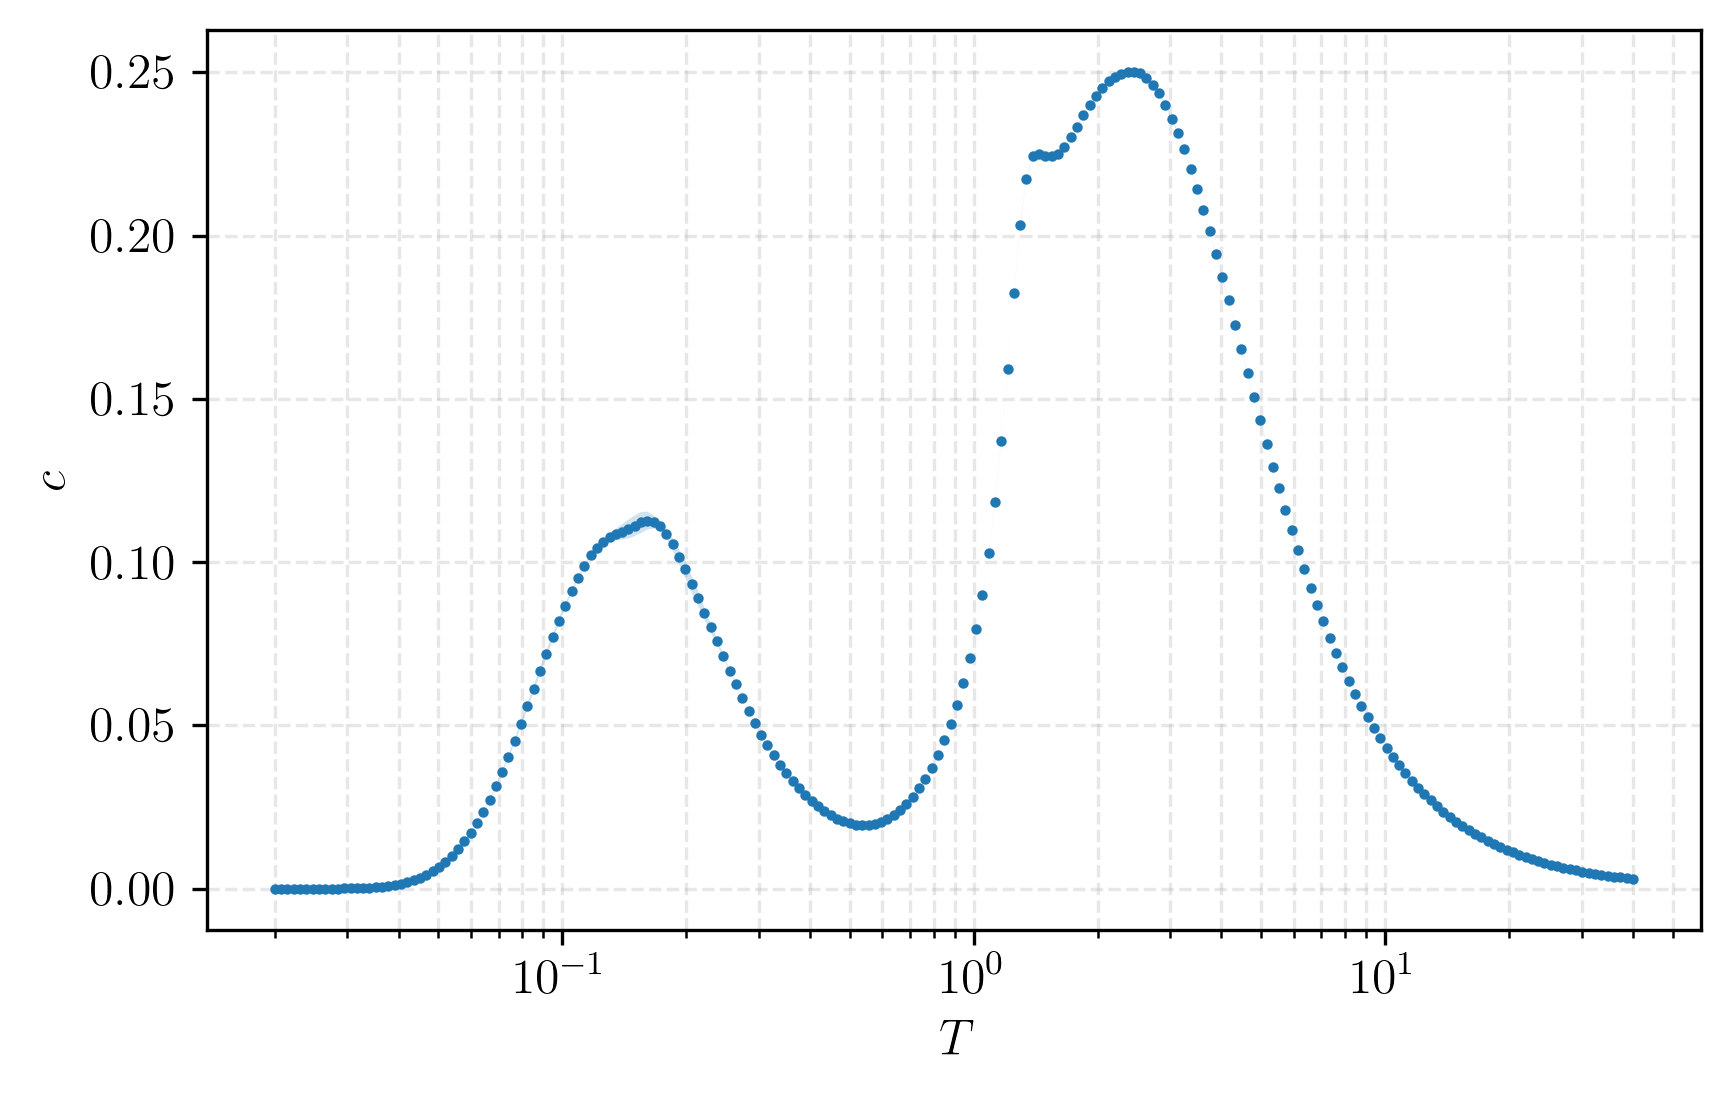

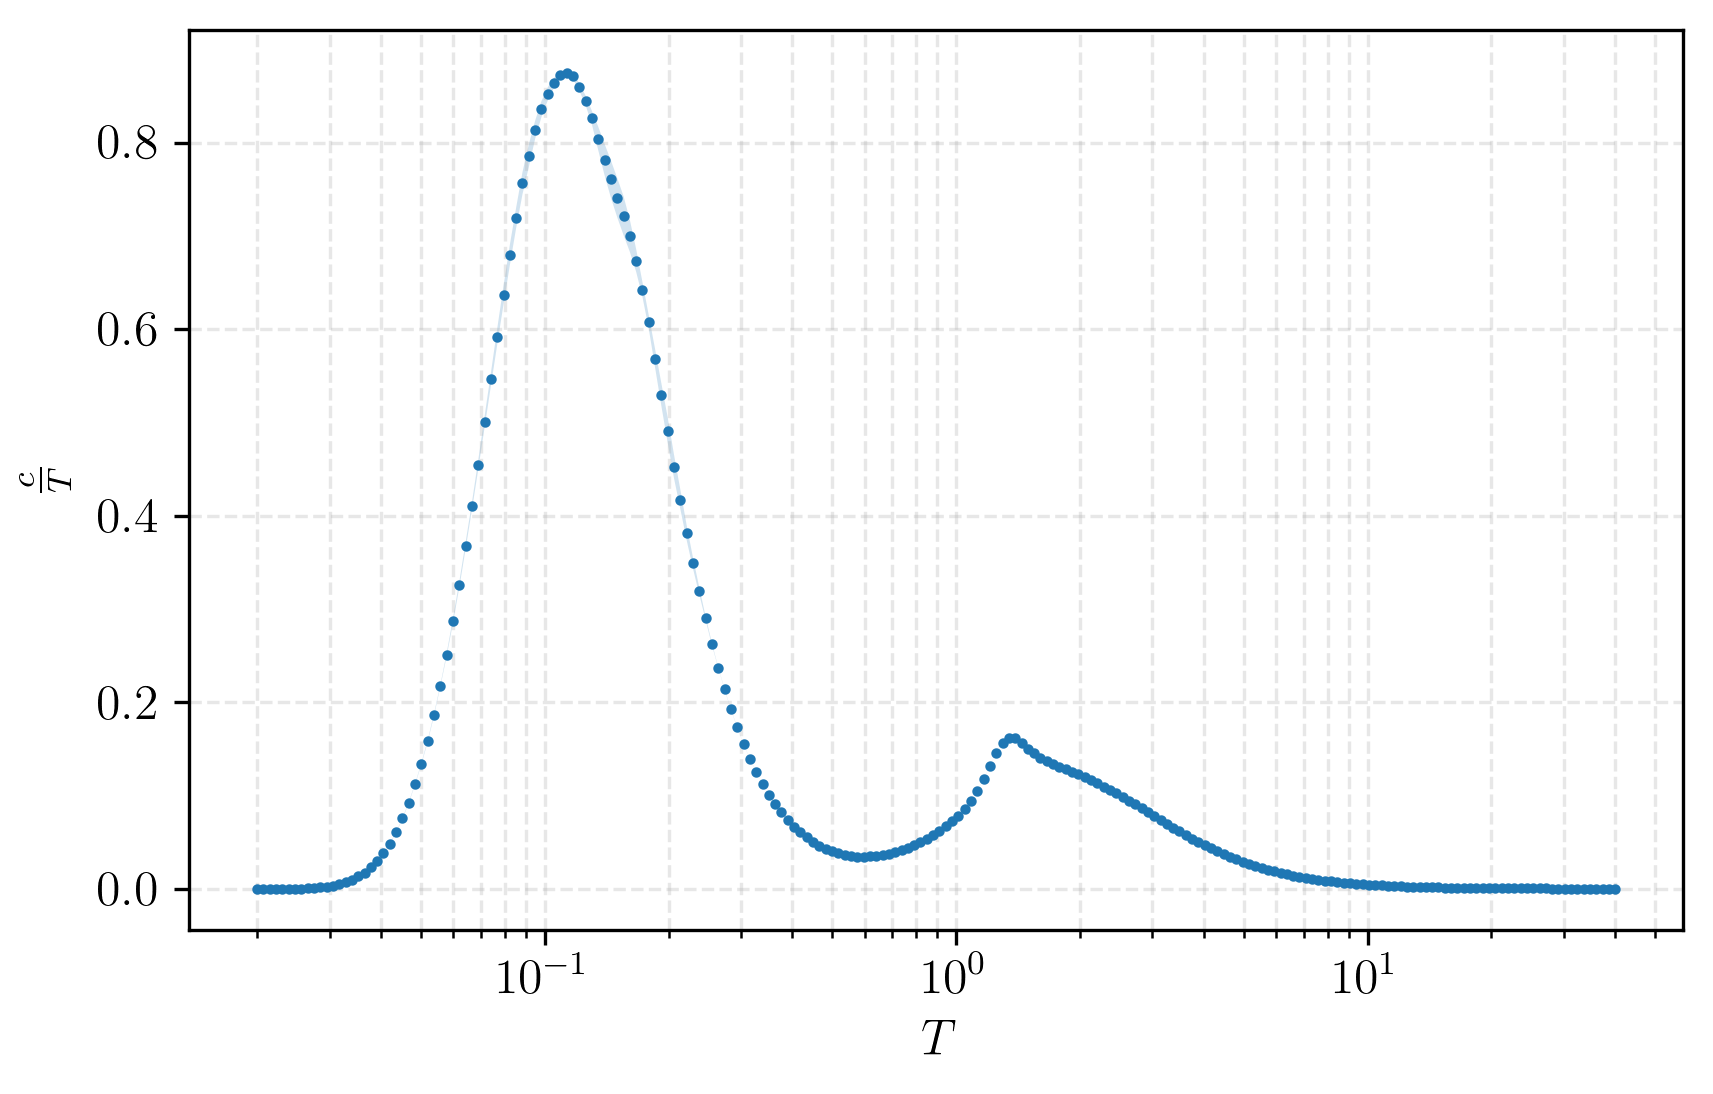

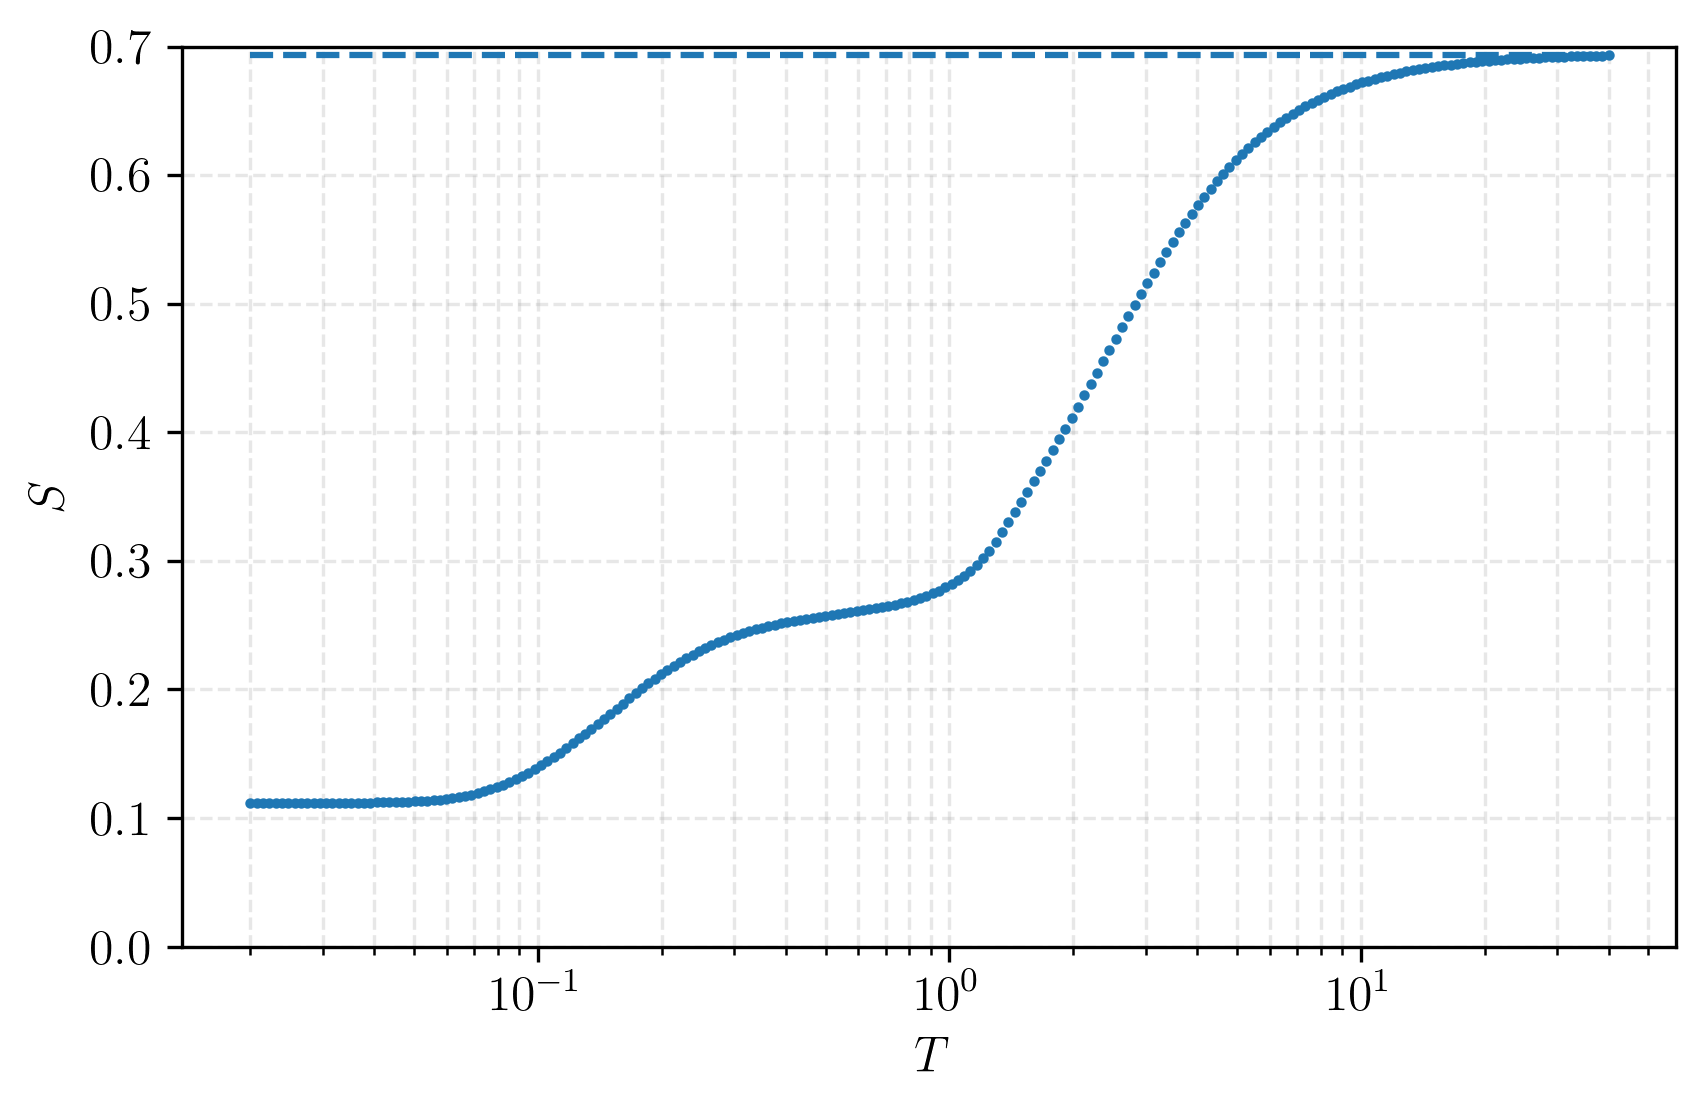

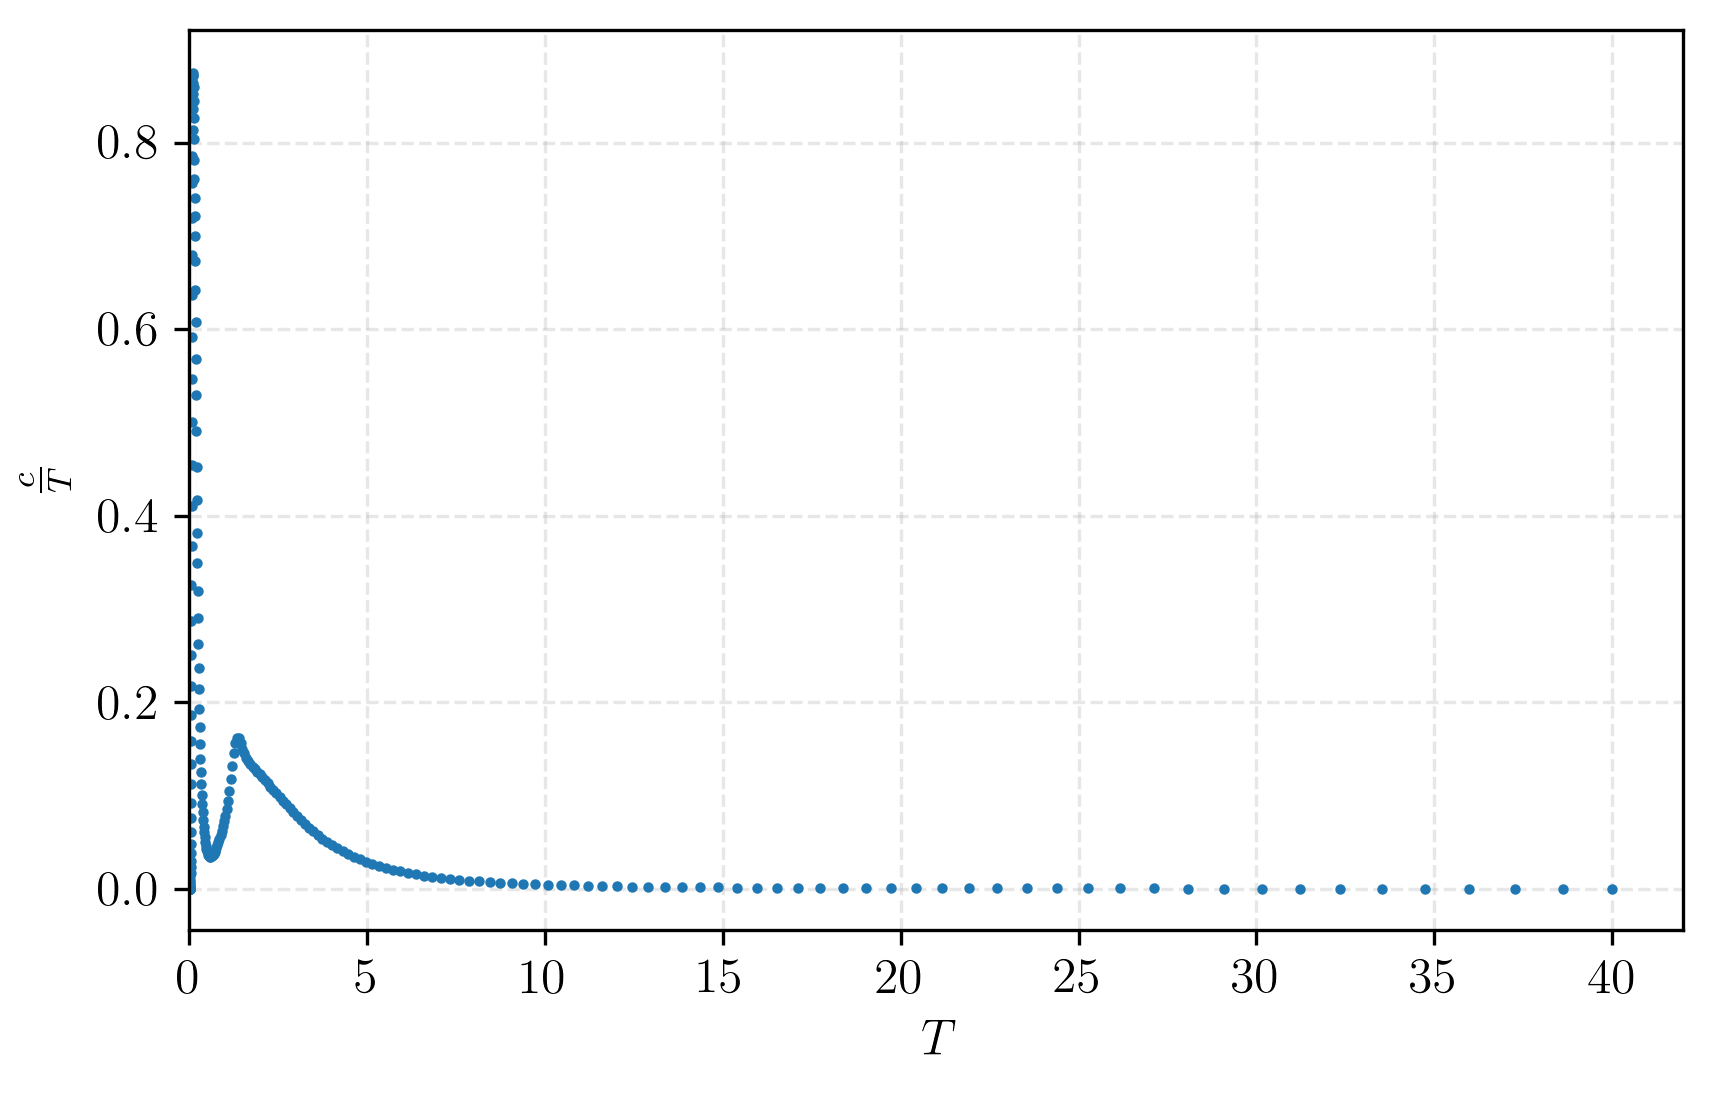

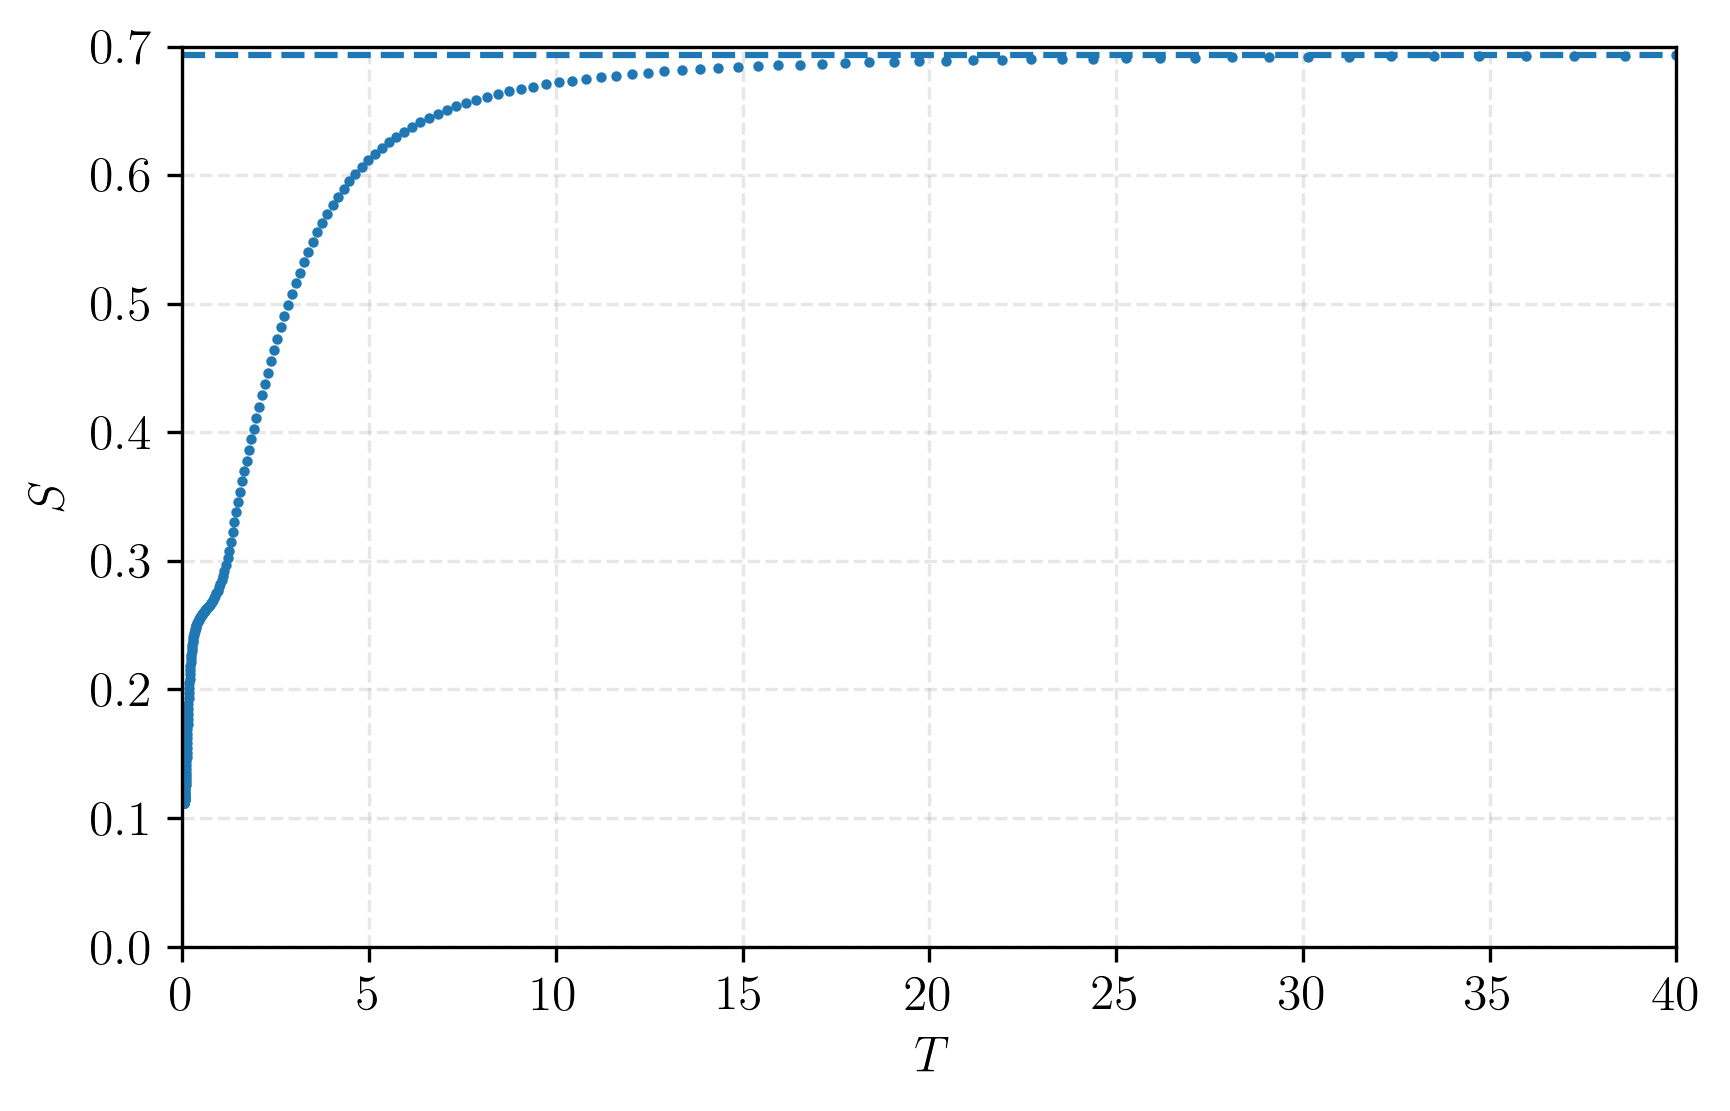

In [36]:
###########################################
        ## STATISTICS ANALYSIS ##
###########################################
#for i in range(n):
#    af.BasicPlotsE(L, i, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
#                    results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
#                    t_h_varMeanEsq, C, ErrC, J1, J2, J3, J4, **kw)
#
#
if mergeruns:
    nplots = 1
    addsave = "_Merged_"
else:
    nplots = n
    addsave = "_IndependentRuns_"
    
tidmin = 0
tidmax = [105 for i in range(n)]
tidmax = [len(stat_temps[i]) for i in range(n)]
put_legend = False
af.BulkPlotsE(L, nplots, 0, tidmin, tidmax, temperatures_plots, foldername,
                results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
                t_h_varMeanEsq,  t_h_VarE, t_h_ErrVarE,C, ErrC, J1, J2, J3, J4,
              t_h_S, t_h_Smin, t_h_Smax, addsave = addsave,
              figsize = (6,4), markersize = 3, ncol = 2, loc = 'upper right',
              put_legend = put_legend)

In [29]:
if not mergeruns:
    margin = [0.15, 0.15, 0.02, 0.1]
    figsize = (6,4)
    markersize = 3
    ncol = 4
    hid = 0
    plt.figure(figsize=figsize,dpi=300)
    plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
    for i in range(1,n):
        plt.semilogx(temperatures_plots[i][tidmin:tidmax[i]],
                         t_h_MeanE[i][tidmin:tidmax[i]][:,hid]-t_h_MeanE[0][tidmin:tidmax[0]][:,hid],'.', markersize=markersize,\
                          label = r'$it$ = {0}'.format(i))
        #plt.fill_between(temperatures_plots[i][tidmin:tidmax[i]],
        #                 (t_h_MeanE[i][tidmin:tidmax[i]][:,hid]
        #                  - np.sqrt(t_h_varMeanE[i][tidmin:tidmax[i]][:,hid])),
        #                 (t_h_MeanE[i][tidmin:tidmax[i]][:,hid]
        #                  + np.sqrt(t_h_varMeanE[i][tidmin:tidmax[i]][:,hid])),\
        #                 alpha=alpha)
    plt.xlabel(r'$T$')
    plt.ylabel(r'$\Delta E$')
    plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
    if put_legend:
        plt.legend(loc= 'best', ncol = 4, framealpha=0.5)
    plt.savefig('./' + foldername  + results_foldername+ '/ErrorE.pdf')
    plt.savefig('./' + foldername  + results_foldername+ '/ErrorE.png')

    margin = [0.15, 0.15, 0.02, 0.1]
    figsize = (6,4)
    markersize = 3
    ncol = 4
    hid = 0
    plt.figure(figsize=figsize,dpi=300)
    plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
    for i in range(1,n):
        plt.semilogx(temperatures_plots[i][tidmin:tidmax[i]],
                         t_h_S[i][tidmin:tidmax[i]][:,hid]-t_h_S[0][tidmin:tidmax[0]][:,hid],'.', markersize=markersize,\
                          label = r'$it$ = {0}'.format(i))
        plt.fill_between(temperatures_plots[i][tidmin:tidmax[i]],
                         t_h_Smin[i][tidmin:tidmax[i]][:,hid]-t_h_S[0][tidmin:tidmax[0]][:,hid],
                         t_h_Smax[i][tidmin:tidmax[i]][:,hid]-t_h_S[0][tidmin:tidmax[0]][:,hid],\
                         alpha=0.2)
    plt.xlabel(r'$T$')
    plt.ylabel(r'$\Delta S$')
    plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
    if put_legend:
        plt.legend(loc= 'best', ncol = 4, framealpha=0.5)
    plt.savefig('./' + foldername  + results_foldername+ '/ErrorS.pdf')
    plt.savefig('./' + foldername  + results_foldername+ '/ErrorS.png')

else:
    print("S = %f" % t_h_S[0][0], r"+/-", "%f" % max(abs(t_h_S[0][0]-t_h_Smin[0][0]),abs(t_h_S[0][0]-t_h_Smax[0][0])))

S = 0.111945 +/- 0.002245


In [30]:
if mergeruns:
    np.savetxt(foldername + results_foldername + "/AvgS.txt", t_h_S[0])
    np.savetxt(foldername + results_foldername + "/AvgSmin.txt", t_h_Smin[0])
    np.savetxt(foldername + results_foldername + "/AvgSmax.txt", t_h_Smax[0])
    np.savetxt(foldername + results_foldername + "/AvgC.txt", C[0])
    np.savetxt(foldername + results_foldername + "/ErrC.txt", ErrC[0])
    np.savetxt(foldername + results_foldername + "/ErrC.txt", ErrC[0])

In [31]:
print(foldername + results_foldername)

../../MFUs/Runs_15-09-20_EasyPhase_L12/Results_21-09-20_nsms524288_nips4/
